# Life Expectancy Analysis

## Project Overview

This project outlines an Exploratory Data Analysis (EDA) using Python to investigate the various factors influencing life expectancy across 193 countries between 2000 and 2015. The goal is to identify key predictors and understand their relationships with life expectancy, particularly focusing on immunization, mortality, economic, and social factors.

The primary objective of this EDA is to gain a comprehensive understanding of the dataset, identify patterns, anomalies, and relationships between different health and socio-economic indicators and life expectancy. This will lay the groundwork for developing a robust regression model to predict life expectancy and provide actionable insights for countries aiming to improve public health.

## Dataset Overview

#### Identifiers & Time ####
- **Country:** The specific country for which the data is recorded.

- **Year:** The calendar year to which the data corresponds (ranging from 2000 to 2015).

- **Status:** Categorical variable indicating the development status of the country (e.g., "Developed" or "Developing").

#### Health Outcomes & Mortality ####

- **Life expectancy:** The average number of years a person is expected to live in a given country and year (measured in age).

- **Adult Mortality:** The probability of dying between 15 and 60 years of age per 1000 population, considering both sexes.

- **infant deaths:** The total number of infant deaths per 1000 population.

- **under-five deaths:** The total number of deaths among children under five years of age per 1000 population.

- **HIV/AIDS:** The number of deaths per 1000 live births specifically attributed to HIV/AIDS in children aged 0-4 years.

####  Health Risk Factors & Lifestyle ####

- **Alcohol:** Recorded per capita (for individuals 15 years and older) consumption of pure alcohol in liters.

- **BMI:** The average Body Mass Index of the entire population.

- **thinness 1-19 years:** The prevalence (percentage) of thinness among children and adolescents aged 10 to 19 years.

- **thinness 5-9 years:** The prevalence (percentage) of thinness among children aged 5 to 9 years.

#### Immunization Coverage ####

- **Hepatitis B:** The immunization coverage rate (percentage) for Hepatitis B (HepB) among 1-year-olds.

- **Measles:** The number of reported Measles cases per 1000 population.

- **Polio:** The immunization coverage rate (percentage) for Polio (Pol3) among 1-year-olds.

- **Diphtheria:** The immunization coverage rate (percentage) for Diphtheria tetanus toxoid and pertussis (DTP3) among 1-year-olds.

#### Socio-Economic & Health Expenditure Indicators ####

- **percentage expenditure:** The expenditure on health as a percentage of the Gross Domestic Product (GDP) per capita (%).

- **Total expenditure:** The general government expenditure on health as a percentage of total government expenditure (%).

- **GDP:** The Gross Domestic Product per capita, measured in US Dollars (USD).

- **Population:** The total population of the country for the given year.

- **Income composition of resources:** An indicator representing the income component of the Human Development Index (HDI), reflecting the average income level and its distribution.

- **Schooling:** The average number of years of schooling achieved by the population.

## Key Analytical Goals

- How do immunization coverage rates (Hepatitis B, Measles, Polio, Diphtheria) correlate with 'Life expectancy' and infant/under-five mortality rates?

- What is the individual and combined impact of 'Adult Mortality', 'infant deaths', 'under-five deaths', and 'HIV/AIDS' on 'Life expectancy'?

- How do economic indicators such as 'GDP', 'percentage expenditure' on health, 'Total expenditure' on health, and 'Income composition of resources' influence 'Life expectancy'?

- To what extent does 'Schooling' affect 'Life expectancy', and does its influence interact with economic or health outcomes?

- What are the associations between lifestyle factors like 'Alcohol' consumption, 'BMI', and 'thinness' (across different age groups) and 'Life expectancy'?

- How does 'Life expectancy' and its predictors vary between 'Developed' and 'Developing' countries ('Status')?

- What are the overall global trends in 'Life expectancy' and other critical health and socio-economic indicators over the 2000-2015 period?

- Are there distinct temporal trends in 'Life expectancy' or its influencing factors within specific regions or country statuses?

- Are there any unusual data points, extreme values, or unexpected patterns within the dataset that require further investigation?

- Which variables appear to be the most impactful predictors of 'Life expectancy', guiding feature selection for subsequent modeling?

- What data transformations (e.g., for skewed distributions) might be necessary for building a robust regression model?

### Load Required librariesabs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import plotly.express as px
import seaborn as sns

### Load Data Dorm CSV File

In [2]:
# Load csv file
df = pd.read_csv("Life Expectancy Data.csv")
df.head(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


### Data Inspection

In [3]:
# Get all columns name
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [4]:
# get dataframe infomations like data type, counts and non-null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
# Check null value in dataframe
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [6]:
#Check duplicate value in dataframe
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
2933    False
2934    False
2935    False
2936    False
2937    False
Length: 2938, dtype: bool

In [7]:
# Remove all spaces from column names
df.columns = df.columns.str.strip().str.lower()

# Get all numaric column_means mean 
column_means = df.mean(numeric_only=True)

# Fill null values with mean
df.fillna(column_means,inplace=True)

In [8]:
# get descriptive statistics of a dataframe like the central tendency, dispersion, and shape of a distribution
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,2938.0,2.007519e+03,4.613841e+00,2000.00000,2004.000000,2.008000e+03,2.012000e+03,2.015000e+03
life expectancy,2938.0,6.922493e+01,9.507640e+00,36.30000,63.200000,7.200000e+01,7.560000e+01,8.900000e+01
adult mortality,2938.0,1.647964e+02,1.240803e+02,1.00000,74.000000,1.440000e+02,2.270000e+02,7.230000e+02
infant deaths,2938.0,3.030395e+01,1.179265e+02,0.00000,0.000000,3.000000e+00,2.200000e+01,1.800000e+03
alcohol,2938.0,4.602861e+00,3.916288e+00,0.01000,1.092500,4.160000e+00,7.390000e+00,1.787000e+01
percentage expenditure,2938.0,7.382513e+02,1.987915e+03,0.00000,4.685343,6.491291e+01,4.415341e+02,1.947991e+04
hepatitis b,2938.0,8.094046e+01,2.258685e+01,1.00000,80.940461,8.700000e+01,9.600000e+01,9.900000e+01
measles,2938.0,2.419592e+03,1.146727e+04,0.00000,0.000000,1.700000e+01,3.602500e+02,2.121830e+05
bmi,2938.0,3.832125e+01,1.992768e+01,1.00000,19.400000,4.300000e+01,5.610000e+01,8.730000e+01
under-five deaths,2938.0,4.203574e+01,1.604455e+02,0.00000,0.000000,4.000000e+00,2.800000e+01,2.500000e+03


### Feature Engineering ###

In [9]:
'''
Add a 'Region' field to group countries, enabling chunked analysis of the large dataset.

six WHO regions:
1) Africa
2) Americas
3) South-East Asia
4) Europe
5) Eastern Mediterranean
6) Western Pacific 
'''

# Directory for country region
regions = {
    'Afghanistan': 'Eastern Mediterranean',
    'Albania': 'Europe',
    'Algeria': 'Africa',
    'Angola': 'Africa',
    'Antigua and Barbuda': 'Americas',
    'Argentina': 'Americas',
    'Armenia': 'Europe',
    'Australia': 'Western Pacific',
    'Austria': 'Europe',
    'Azerbaijan': 'Europe',
    'Bahamas': 'Americas',
    'Bahrain': 'Eastern Mediterranean',
    'Bangladesh': 'South-East Asia',
    'Barbados': 'Americas',
    'Belarus': 'Europe',
    'Belgium': 'Europe',
    'Belize': 'Americas',
    'Benin': 'Africa',
    'Bhutan': 'South-East Asia',
    'Bolivia (Plurinational State of)': 'Americas',
    'Bosnia and Herzegovina': 'Europe',
    'Botswana': 'Africa',
    'Brazil': 'Americas',
    'Brunei Darussalam': 'Western Pacific',
    'Bulgaria': 'Europe',
    'Burkina Faso': 'Africa',
    'Burundi': 'Africa',
    "Côte d'Ivoire": 'Africa',
    'Cabo Verde': 'Africa',
    'Cambodia': 'Western Pacific',
    'Cameroon': 'Africa',
    'Canada': 'Americas',
    'Central African Republic': 'Africa',
    'Chad': 'Africa',
    'Chile': 'Americas',
    'China': 'Western Pacific',
    'Colombia': 'Americas',
    'Comoros': 'Africa',
    'Congo': 'Africa',
    'Cook Islands': 'Western Pacific',
    'Costa Rica': 'Americas',
    'Croatia': 'Europe',
    'Cuba': 'Americas',
    'Cyprus': 'Europe',
    'Czechia': 'Europe',
    "Democratic People's Republic of Korea": 'South-East Asia',
    'Democratic Republic of the Congo': 'Africa',
    'Denmark': 'Europe',
    'Djibouti': 'Eastern Mediterranean',
    'Dominica': 'Americas',
    'Dominican Republic': 'Americas',
    'Ecuador': 'Americas',
    'Egypt': 'Eastern Mediterranean',
    'El Salvador': 'Americas',
    'Equatorial Guinea': 'Africa',
    'Eritrea': 'Africa',
    'Estonia': 'Europe',
    'Ethiopia': 'Africa',
    'Fiji': 'Western Pacific',
    'Finland': 'Europe',
    'France': 'Europe',
    'Gabon': 'Africa',
    'Gambia': 'Africa',
    'Georgia': 'Europe',
    'Germany': 'Europe',
    'Ghana': 'Africa',
    'Greece': 'Europe',
    'Grenada': 'Americas',
    'Guatemala': 'Americas',
    'Guinea': 'Africa',
    'Guinea-Bissau': 'Africa',
    'Guyana': 'Americas',
    'Haiti': 'Americas',
    'Honduras': 'Americas',
    'Hungary': 'Europe',
    'Iceland': 'Europe',
    'India': 'South-East Asia',
    'Indonesia': 'South-East Asia',
    'Iran (Islamic Republic of)': 'Eastern Mediterranean',
    'Iraq': 'Eastern Mediterranean',
    'Ireland': 'Europe',
    'Israel': 'Europe', 
    'Italy': 'Europe',
    'Jamaica': 'Americas',
    'Japan': 'Western Pacific',
    'Jordan': 'Eastern Mediterranean',
    'Kazakhstan': 'Europe',
    'Kenya': 'Africa',
    'Kiribati': 'Western Pacific',
    'Kuwait': 'Eastern Mediterranean',
    'Kyrgyzstan': 'Europe',
    "Lao People's Democratic Republic": 'Western Pacific',
    'Latvia': 'Europe',
    'Lebanon': 'Eastern Mediterranean',
    'Lesotho': 'Africa',
    'Liberia': 'Africa',
    'Libya': 'Eastern Mediterranean',
    'Lithuania': 'Europe',
    'Luxembourg': 'Europe',
    'Madagascar': 'Africa',
    'Malawi': 'Africa',
    'Malaysia': 'Western Pacific',
    'Maldives': 'South-East Asia',
    'Mali': 'Africa',
    'Malta': 'Europe',
    'Marshall Islands': 'Western Pacific',
    'Mauritania': 'Africa',
    'Mauritius': 'Africa',
    'Mexico': 'Americas',
    'Micronesia (Federated States of)': 'Western Pacific',
    'Monaco': 'Europe',
    'Mongolia': 'Western Pacific',
    'Montenegro': 'Europe',
    'Morocco': 'Africa',
    'Mozambique': 'Africa',
    'Myanmar': 'South-East Asia',
    'Namibia': 'Africa',
    'Nauru': 'Western Pacific',
    'Nepal': 'South-East Asia',
    'Netherlands': 'Europe',
    'New Zealand': 'Western Pacific',
    'Nicaragua': 'Americas',
    'Niger': 'Africa',
    'Nigeria': 'Africa',
    'Niue': 'Western Pacific',
    'Norway': 'Europe',
    'Oman': 'Eastern Mediterranean',
    'Pakistan': 'Eastern Mediterranean',
    'Palau': 'Western Pacific',
    'Panama': 'Americas',
    'Papua New Guinea': 'Western Pacific',
    'Paraguay': 'Americas',
    'Peru': 'Americas',
    'Philippines': 'Western Pacific',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Qatar': 'Eastern Mediterranean',
    'Republic of Korea': 'Western Pacific',
    'Republic of Moldova': 'Europe',
    'Romania': 'Europe',
    'Russian Federation': 'Europe',
    'Rwanda': 'Africa',
    'Saint Kitts and Nevis': 'Americas',
    'Saint Lucia': 'Americas',
    'Saint Vincent and the Grenadines': 'Americas',
    'Samoa': 'Western Pacific',
    'San Marino': 'Europe',
    'Sao Tome and Principe': 'Africa',
    'Saudi Arabia': 'Eastern Mediterranean',
    'Senegal': 'Africa',
    'Serbia': 'Europe',
    'Seychelles': 'Africa',
    'Sierra Leone': 'Africa',
    'Singapore': 'Western Pacific',
    'Slovakia': 'Europe',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Western Pacific',
    'Somalia': 'Eastern Mediterranean',
    'South Africa': 'Africa',
    'South Sudan': 'Eastern Mediterranean', 
    'Spain': 'Europe',
    'Sri Lanka': 'South-East Asia',
    'Sudan': 'Eastern Mediterranean',
    'Suriname': 'Americas',
    'Swaziland': 'Africa', 
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Syrian Arab Republic': 'Eastern Mediterranean',
    'Tajikistan': 'Europe',
    'Thailand': 'South-East Asia',
    'The former Yugoslav republic of Macedonia': 'Europe',
    'Timor-Leste': 'South-East Asia',
    'Togo': 'Africa',
    'Tonga': 'Western Pacific',
    'Trinidad and Tobago': 'Americas',
    'Tunisia': 'Africa',
    'Turkey': 'Europe',
    'Turkmenistan': 'Europe',
    'Tuvalu': 'Western Pacific',
    'Uganda': 'Africa',
    'Ukraine': 'Europe',
    'United Arab Emirates': 'Eastern Mediterranean',
    'United Kingdom of Great Britain and Northern Ireland': 'Europe',
    'United Republic of Tanzania': 'Africa',
    'United States of America': 'Americas',
    'Uruguay': 'Americas',
    'Uzbekistan': 'Europe',
    'Vanuatu': 'Western Pacific',
    'Venezuela (Bolivarian Republic of)': 'Americas',
    'Viet Nam': 'Western Pacific',
    'Yemen': 'Eastern Mediterranean',
    'Zambia': 'Africa',
    'Zimbabwe': 'Africa'
}

df['region'] = df['country'].map(regions)
print(df[['country','region']])

          country                 region
0     Afghanistan  Eastern Mediterranean
1     Afghanistan  Eastern Mediterranean
2     Afghanistan  Eastern Mediterranean
3     Afghanistan  Eastern Mediterranean
4     Afghanistan  Eastern Mediterranean
...           ...                    ...
2933     Zimbabwe                 Africa
2934     Zimbabwe                 Africa
2935     Zimbabwe                 Africa
2936     Zimbabwe                 Africa
2937     Zimbabwe                 Africa

[2938 rows x 2 columns]


# Exploratory Analysis

### Average Life Expectancy by Country Status

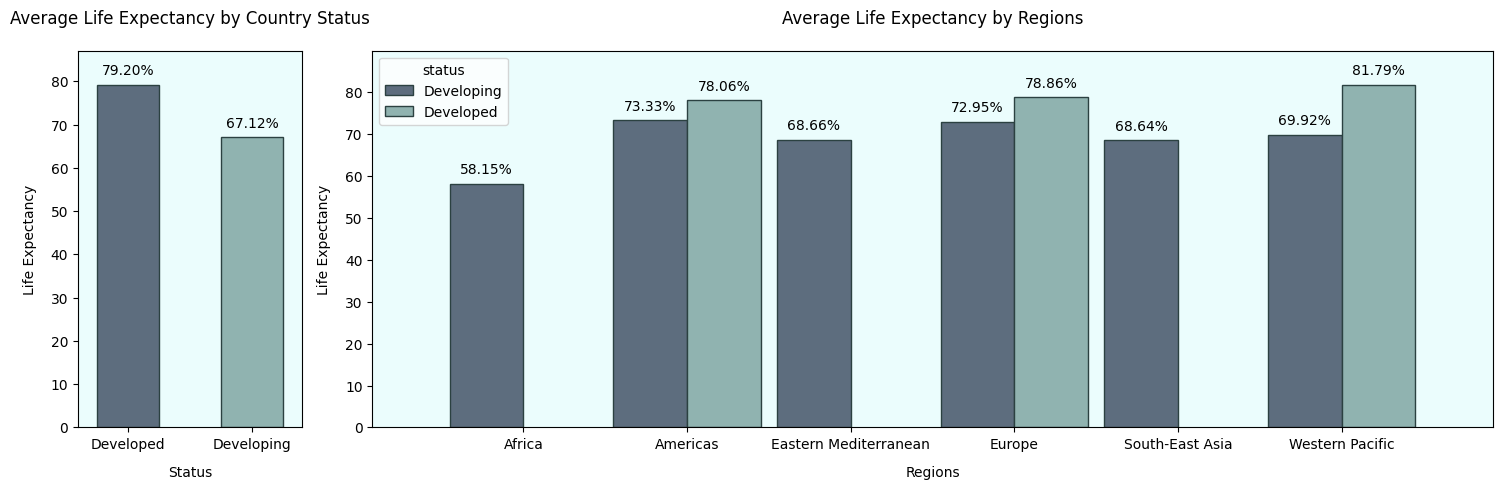

In [10]:
# set chart style properties
fig, ax = plt.subplots(1, 2, figsize=(15, 5), gridspec_kw={'width_ratios': [1, 5]})

# Average Life Expectancy by Country Status
avg_life_exp = df.groupby(['status'])['life expectancy'].mean().reset_index()

# Create Barplot
sns.barplot(data=avg_life_exp,
                 x="status",
                 y="life expectancy",
                 ax=ax[0],
                 palette = ['#586d83','#8ab9b5'], 
                 hue = "status",
                 errorbar = None, 
                 width = 0.5,
                 edgecolor="#2b4141")

# set barplot properties
ax[0].margins(0.1)
ax[0].set_facecolor("#ebfdfd")
ax[0].set_title('Average Life Expectancy by Country Status',y=1.05)
ax[0].set_xlabel('Status',labelpad=10)
ax[0].set_ylabel('Life Expectancy',labelpad=10)

# set cost value on lagend
for container in ax[0].containers:
    ax[0].bar_label(container,
                 fmt='{:,.2f}%',
                 padding=5)

# plt.subplot(1,2,2)

# Average Life Expectancy by region Status
avg_life_exp_reg = df.groupby(['region','status'])['life expectancy'].mean().reset_index()

# Create Barplot
sns.barplot(data=avg_life_exp_reg,
                 x="region",
                 y="life expectancy",
                 ax=ax[1],
                 palette = ['#586d83','#8ab9b5'], 
                 hue = "status",
                 errorbar = None, 
                 width = 0.9,
                 edgecolor="#2b4141")

# set barplot properties
ax[1].margins(x=0.08, y=0.1)
ax[1].set_facecolor("#ebfdfd")
ax[1].set_title('Average Life Expectancy by Regions',y=1.05)
ax[1].set_xlabel('Regions',labelpad=10)
ax[1].set_ylabel('Life Expectancy',labelpad=10)

# set cost value on lagend
for container in ax[1].containers:
    ax[1].bar_label(container,
                 fmt='{:,.2f}%',
                 padding=5)
    
plt.tight_layout()
plt.savefig('lift.png')
plt.show()

**Average Life Expectancy by Country Status**

This chart clearly shows a significant disparity in average life expectancy between "Developed" and "Developing" countries. Developed countries have a notably higher average life expectancy (79.20%) compared to Developing countries (67.12%).

**Average Life Expectancy by Regions**

This chart provides a more granular view, breaking down life expectancy by regions and further differentiating by country status within each region.

- **Europe, Americas** and **Western Pacific** regions show the highest average life expectancies, particularly for "Developed" countries within those regions.

- **Africa** has the lowest average life expectancy, predominantly represented by "Developing" countries.

- The chart highlights that even within a region, the Developed versus Developing status plays a crucial role in life expectancy.

The charts collectively demonstrate that both a country's development status and its geographical region are strong indicators of its population's average life expectancy. There's a clear trend of higher life expectancy in developed nations and certain regions Europe, Western Pacific, while developing nations, especially in regions like Africa, face lower average life expectancies. The second chart further emphasizes the persistent gap between developed and developing nations even within the same geographical region.

### Life Expectancy Trands Over the Year By Country Status And Region

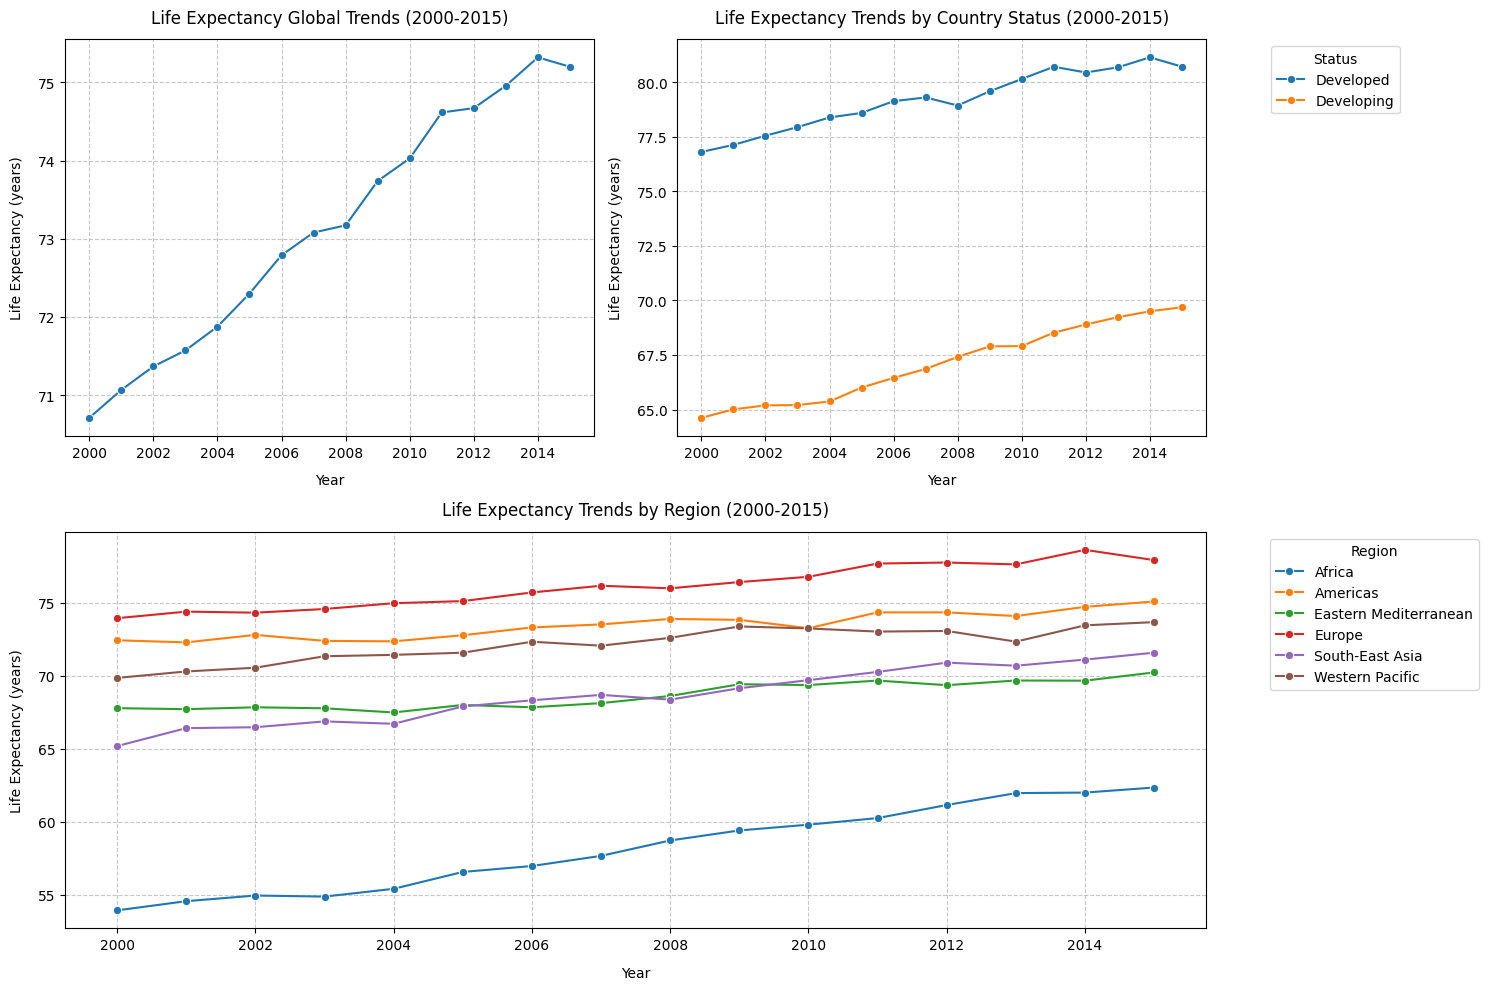

In [11]:
# Create a fig
fig = plt.figure(figsize=(15, 10))

# set gridspace row and columns
gs = gridspec.GridSpec(2, 2, figure=fig)

# Create First subplot
ax1 = fig.add_subplot(gs[0, 0])

# Average Life Expectancy ground by year and Status
status_trends = df.groupby(['year', 'status'])['life expectancy'].mean().reset_index()

# create lineplot
sns.lineplot(data=status_trends,
             x='year',
             y='life expectancy',
             marker='o',
             ax=ax1,
             errorbar=None)

# set chart property
ax1.set_title('Life Expectancy Global Trends (2000-2015)',y=1.02)
ax1.set_xlabel('Year',labelpad=10)
ax1.set_ylabel('Life Expectancy (years)',labelpad=10)
ax1.grid(True, linestyle='--', alpha=0.7)

# Create second subplot
ax2 = fig.add_subplot(gs[0, 1])

# create lineplot
sns.lineplot(data=status_trends,
             x='year',
             y='life expectancy',
             hue='status',
             marker='o',
             ax=ax2)

# set chart property
ax2.set_title('Life Expectancy Trends by Country Status (2000-2015)',y=1.02)
ax2.set_xlabel('Year',labelpad=10)
ax2.set_ylabel('Life Expectancy (years)',labelpad=10)

ax2.legend(title='Status',
           bbox_to_anchor=(1.11, 1),
           loc='upper left')

ax2.grid(True, linestyle='--', alpha=0.7)

# Average Life Expectancy by region Status
region_trends = df.groupby(['year','region'])['life expectancy'].mean().reset_index()

# Create third subplot
ax3 = fig.add_subplot(gs[1, :])

# create lineplot
sns.lineplot(data=region_trends,
             x='year',
             y='life expectancy',
             hue='region',
             marker='o',
             ax=ax3)

# set chart property
ax3.set_title('Life Expectancy Trends by Region (2000-2015)',y=1.02)
ax3.set_xlabel('Year',labelpad=10)
ax3.set_ylabel('Life Expectancy (years)',labelpad=10)

ax3.legend(title='Region',
           bbox_to_anchor=(1.05, 1),
           loc='upper left')

ax3.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

**Life Expectancy Global Trends (2000-2015)**

This chart shows the overall global average life expectancy trend. There is a clear and consistent upward trend in global life expectancy from approximately 70.8 years in 2000 to about 75.5 years in 2015, indicating significant improvements in global health over this 15-year period.

**Life Expectancy Trends by Country Status (2000-2015)**

This chart compares the life expectancy trends between "Developed" and "Developing" countries.

- **Developed countries** maintain a consistently **higher life expectancy** throughout the period, starting around 77 years and rising to over 80 years. The increase is steady but less steep, as they are already at higher levels.

- **Developing countries** start at a much **lower life expectancy** (around 65 years) but show a steeper and more pronounced increase over the 15 years, reaching close to 70 years. This indicates a significant closing of the gap in life expectancy between the two status groups during this period.

**Life Expectancy Trends by Region (2000-2015)**

- **Europe, Americas and Western Pacific** regions consistently have the **highest average life expectancies** throughout the period, showing gradual increases.

- **Africa** starts with the **lowest average life expectancy** (around 54 years) but exhibits the most substantial and rapid increase over the 15 years, reaching over 62 years. This highlights significant progress in health outcomes in the African region.

- **Eastern Mediterranean, and South-East Asia** regions show moderate and consistent increases in life expectancy, generally falling between the high-performing European/Western Pacific regions and the rapidly improving African region.

The charts collectively illustrate a positive global trend in life expectancy from 2000 to 2015. While developed countries and regions like Europe and Western Pacific maintained higher life expectancies, developing countries and particularly the African region demonstrated remarkable and often steeper improvements, indicating a narrowing of health disparities over this period. This suggests that global health initiatives and development efforts during these years had a significant positive impact, especially in regions that started with lower life expectancies.

### Average Mortality Values by Country Status

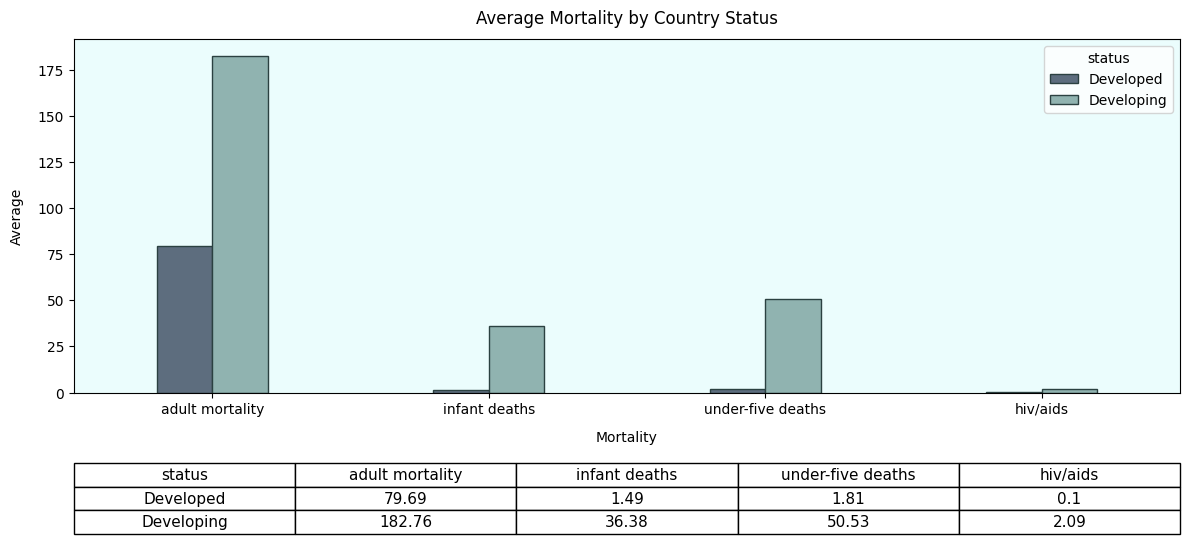

In [12]:
# set chart style properties
plt.figure(figsize=(12,6))

# Average Mortality by Country Status
avg_mortality = df.groupby(['status'])[[
    'adult mortality',
    'infant deaths',
    'under-five deaths',
    'hiv/aids']].mean().reset_index()
avg_mortality = avg_mortality.round(2)

# Re-arrange dataframe 
mortality_melted = avg_mortality.melt(id_vars='status',
                                     var_name='type',
                                     value_name='value')

# Create Barplot
ax = sns.barplot(data=mortality_melted,
                 x="type",
                 y="value",
                 palette = ['#586d83','#8ab9b5'], 
                 hue = "status",
                 errorbar = None, 
                 width = 0.4,
                 edgecolor="#2b4141")

# set barplot properties
ax.set_facecolor("#ebfdfd")
ax.set_title('Average Mortality by Country Status',y=1.02)
ax.set_xlabel('Mortality',labelpad=10)
ax.set_ylabel('Average',labelpad=10)

# Create Dataframe for table data
table_df = pd.DataFrame(avg_mortality)
table = ax.table(colLabels=table_df.columns,
                  cellText=table_df.values,
                  bbox = [0, -0.4, 1.0, 0.2],
                  cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(11)

plt.tight_layout()
plt.show()

The bar chart visually represents the stark differences in average mortality rates between between "Developed" and "Developing" countries. The table provides the precise numerical values for the average mortality rates depicted in the bar chart. This allows for a detailed quantitative comparison, confirming the visual insights from the chart.

For all four mortality types, Developing countries consistently show significantly higher average mortality rates compared to Developed countries.

- **Adult Mortality** has the largest absolute difference, with Developing countries experiencing a much higher average (over 180) compared to Developed countries (around 80).

- **Infant Deaths and Under-Five Deaths** also show substantial differences, with Developing countries having significantly higher rates.

- **HIV/AIDS** related deaths, while lower in absolute numbers for both, are still considerably higher on average in Developing countries.

Both the bar chart and the data table powerfully highlight the considerable disparities in public health outcomes related to mortality between developed and developing nations. Developing countries face a much heavier burden across all measured mortality indicators, underscoring the ongoing global health challenges and the critical need for targeted interventions in these regions.

### Average Immunization by Country Status

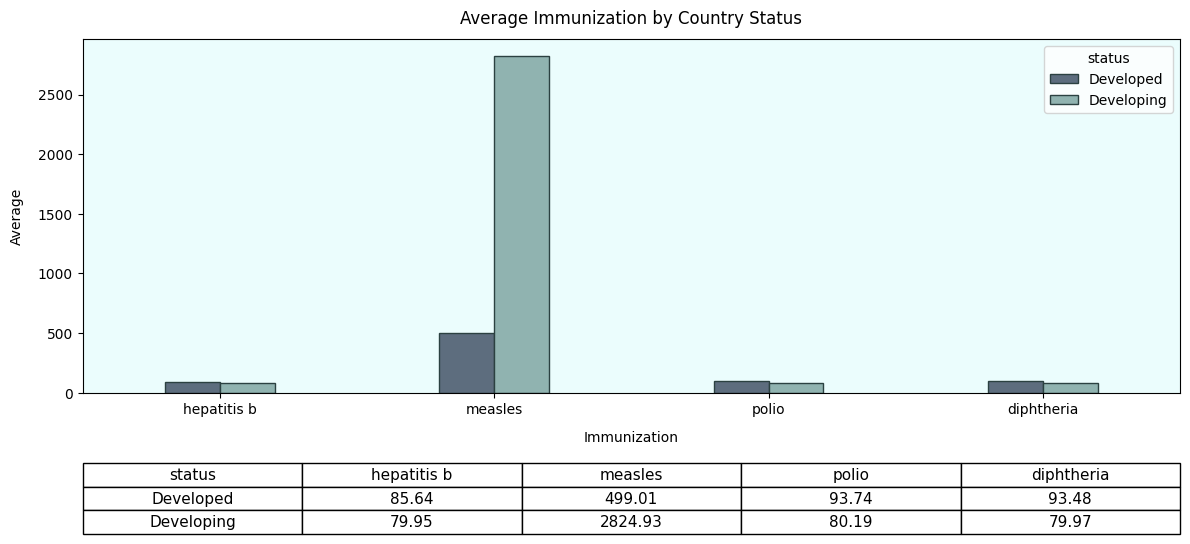

In [13]:
# set chart style properties
plt.figure(figsize=(12,6))

# Average Immunization by Country Status
avg_immunization = df.groupby(['status'])[[
    'hepatitis b',
    'measles',
    'polio',
    'diphtheria']].mean().reset_index()
avg_immunization = avg_immunization.round(2)

# Re-arrange dataframe 
immunization_melted = avg_immunization.melt(id_vars='status',
                                     var_name='type',
                                     value_name='value')

# Create Barplot
ax = sns.barplot(data=immunization_melted,
                 x="type",
                 y="value",
                 palette = ['#586d83','#8ab9b5'], 
                 hue = "status",
                 errorbar = None, 
                 width = 0.4,
                 edgecolor="#2b4141")

# set barplot properties
ax.set_facecolor("#ebfdfd")
ax.set_title('Average Immunization by Country Status',y=1.02)
ax.set_xlabel('Immunization',labelpad=10)
ax.set_ylabel('Average',labelpad=10)

# Create Dataframe for table data
table_df = pd.DataFrame(avg_immunization)
table = ax.table(colLabels=table_df.columns,
                  cellText=table_df.values,
                  bbox = [0, -0.4, 1.0, 0.2],
                  cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(11)

plt.tight_layout()
plt.show()

The bar chart visually represents the stark differences in Immunization rates between between "Developed" and "Developing" countries. The table provides the precise numerical values for the Immunization rates depicted in the bar chart. This allows for a detailed quantitative comparison, confirming the visual insights from the chart.

- For **Hepatitis B, Polio, and Diphtheria**, "Developed" countries show slightly higher average immunization coverage rates compared to "Developing" countries, though the difference appears less dramatic than in mortality rates.

- However, for **Measles**, there's a striking and counter-intuitive observation: "Developing" countries show an exceptionally high average value (over 2500) compared to "Developed" countries (around 500). Given that "Measles" is described as "number of reported cases per 1000 population" in your dataset overview, this indicates that **Developing countries, on average, experienced a vastly higher number of reported Measles cases** than Developed countries during the period. This is a critical finding that suggests significant challenges in measles control or reporting in developing regions.

The charts reveal that while "Developed" countries generally maintain higher immunization coverage for diseases like Hepatitis B, Polio, and Diphtheria, "Developing" countries face a significantly higher burden of reported Measles cases. This suggests that despite efforts, measles remains a substantial public health challenge in developing nations, potentially due to lower effective vaccination coverage, weaker surveillance systems, or other factors leading to widespread outbreaks. This distinct pattern for Measles warrants further investigation to understand the underlying causes and implications for public health strategies.

### Average Social-Economic by Country Status

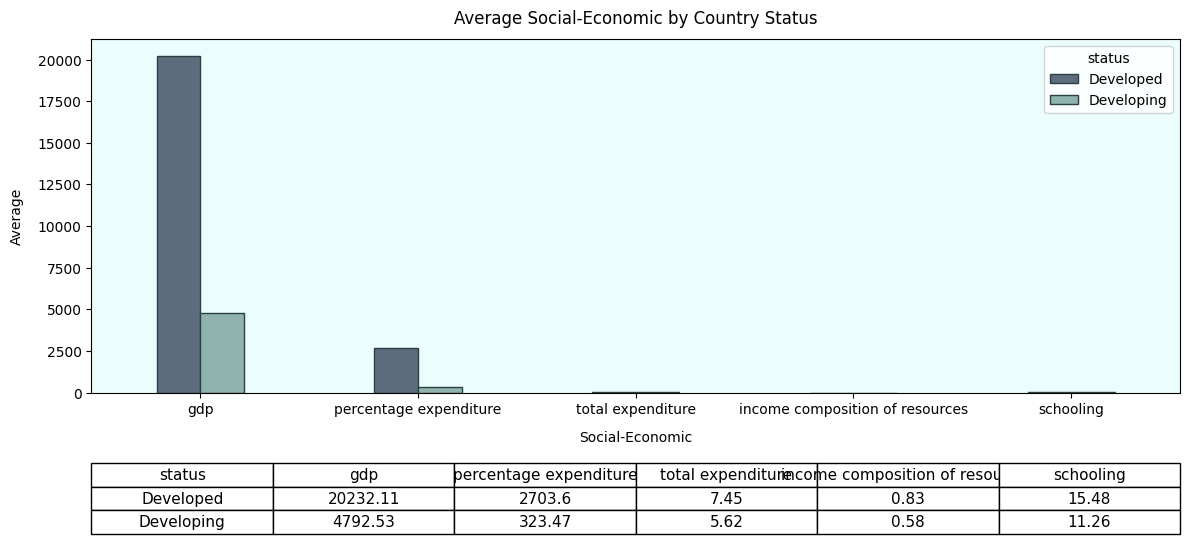

In [14]:
# set chart style properties
plt.figure(figsize=(12,6))

# Average Social-Economic by Country Status
avg_social_economic = df.groupby(['status'])[[
    'gdp',
    'percentage expenditure',
    'total expenditure',
    'income composition of resources',
    'schooling']].mean().reset_index()
avg_social_economic = avg_social_economic.round(2)

# Re-arrange dataframe 
social_economic_melted = avg_social_economic.melt(id_vars='status',
                                     var_name='type',
                                     value_name='value')

# Create Barplot
ax = sns.barplot(data=social_economic_melted,
                 x="type",
                 y="value",
                 palette = ['#586d83','#8ab9b5'], 
                 hue = "status",
                 errorbar = None, 
                 width = 0.4,
                 edgecolor="#2b4141")

# set barplot properties
ax.set_facecolor("#ebfdfd")
ax.set_title('Average Social-Economic by Country Status',y=1.02)
ax.set_xlabel('Social-Economic',labelpad=10)
ax.set_ylabel('Average',labelpad=10)

# Create Dataframe for table data
table_df = pd.DataFrame(avg_social_economic)
table = ax.table(colLabels=table_df.columns,
                  cellText=table_df.values,
                  bbox = [0, -0.4, 1.0, 0.2],
                  cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(11)

plt.tight_layout()
plt.show()

The bar chart visually represents the stark differences in social-economic indicators between "Developed" and "Developing" countries. The table provides the precise numerical values for the social-economic indicators depicted in the bar chart. This allows for a detailed quantitative comparison, confirming the visual insights from the chart.

- **GDP:** Developed countries have a dramatically higher average GDP (over 20,000) compared to Developing countries (around 4,700), indicating a vast difference in economic output per capita.

- **Percentage Expenditure:** Developed countries allocate a much larger percentage of their GDP per capita to health expenditure (over 2,700) than Developing countries (around 320).

- **Total Expenditure:** While the absolute difference is smaller, Developed countries still show a higher average total government expenditure on health (7.45) compared to Developing countries (5.62).

- **Income Composition of Resources:** Developed countries have a higher average "Income composition of resources" (0.83) than Developing countries (0.58), reflecting better overall human development and income levels.

- **Schooling:** Developed countries show a considerably higher average number of years of schooling (15.48) compared to Developing countries (11.26).

Both the bar chart and the data table unequivocally demonstrate that "Developed" countries consistently outperform "Developing" countries across all measured social and economic indicators. This stark difference in economic prosperity, investment in health, and educational attainment directly correlates with the previously observed disparities in life expectancy and mortality rates. The data underscores the profound impact of socio-economic development on the health and well-being of a nation's population.

## Average Lifestyle by Country Status

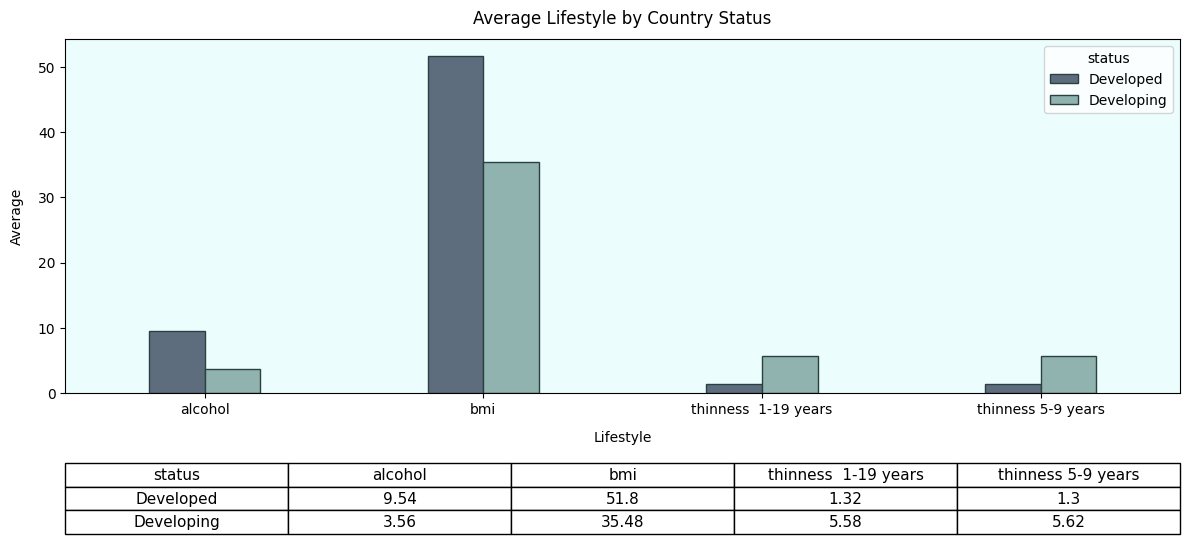

In [15]:
# set chart style properties
plt.figure(figsize=(12,6))

# Average Lifestyle by Country Status
avg_lifestyle = df.groupby(['status'])[['alcohol', 'bmi', 'thinness  1-19 years', 'thinness 5-9 years']].mean().reset_index()
avg_lifestyle = avg_lifestyle.round(2)

# Re-arrange dataframe 
lifestyle_melted = avg_lifestyle.melt(id_vars='status',
                                     var_name='type',
                                     value_name='value')

# Create Barplot
ax = sns.barplot(data=lifestyle_melted,
                 x="type",
                 y="value",
                 palette = ['#586d83','#8ab9b5'], 
                 hue = "status",
                 errorbar = None, 
                 width = 0.4,
                 edgecolor="#2b4141")

# set barplot properties
ax.set_facecolor("#ebfdfd")
ax.set_title('Average Lifestyle by Country Status',y=1.02)
ax.set_xlabel('Lifestyle',labelpad=10)
ax.set_ylabel('Average',labelpad=10)

# Create Dataframe for table data
table_df = pd.DataFrame(avg_lifestyle)
table = ax.table(colLabels=table_df.columns,
                  cellText=table_df.values,
                  bbox = [0, -0.4, 1.0, 0.2],
                  cellLoc='center')

table.auto_set_font_size(False)
table.set_fontsize(11)

plt.tight_layout()
plt.show()

The bar chart visually represents the stark differences in lifestyle factors between "Developed" and "Developing" countries. The table provides the precise numerical values for the lifestyle factors depicted in the bar chart. This allows for a detailed quantitative comparison, confirming the visual insights from the chart.

- **Alcohol:** Developed countries show a significantly higher average alcohol consumption (around 9.5) compared to Developing countries (around 3.5).

- **BMI:** Developed countries have a considerably higher average BMI (over 50) than Developing countries (around 35). This suggests a higher prevalence of overweight or obesity in developed nations.

- **Thinness (1-19 years & 5-9 years):** Conversely, Developing countries show notably higher average rates of thinness in both age groups (around 5.5) compared to Developed countries (around 1.3). This indicates a greater prevalence of underweight or malnutrition in developing nations.

Both the bar chart and the data table highlight contrasting lifestyle patterns between "Developed" and "Developing" countries. Developed nations tend to have higher average alcohol consumption and BMI, while developing nations face a greater challenge with thinness (malnutrition) among their younger populations. These differences reflect varying dietary habits, economic conditions, and public health challenges related to nutrition and lifestyle across different development statuses.

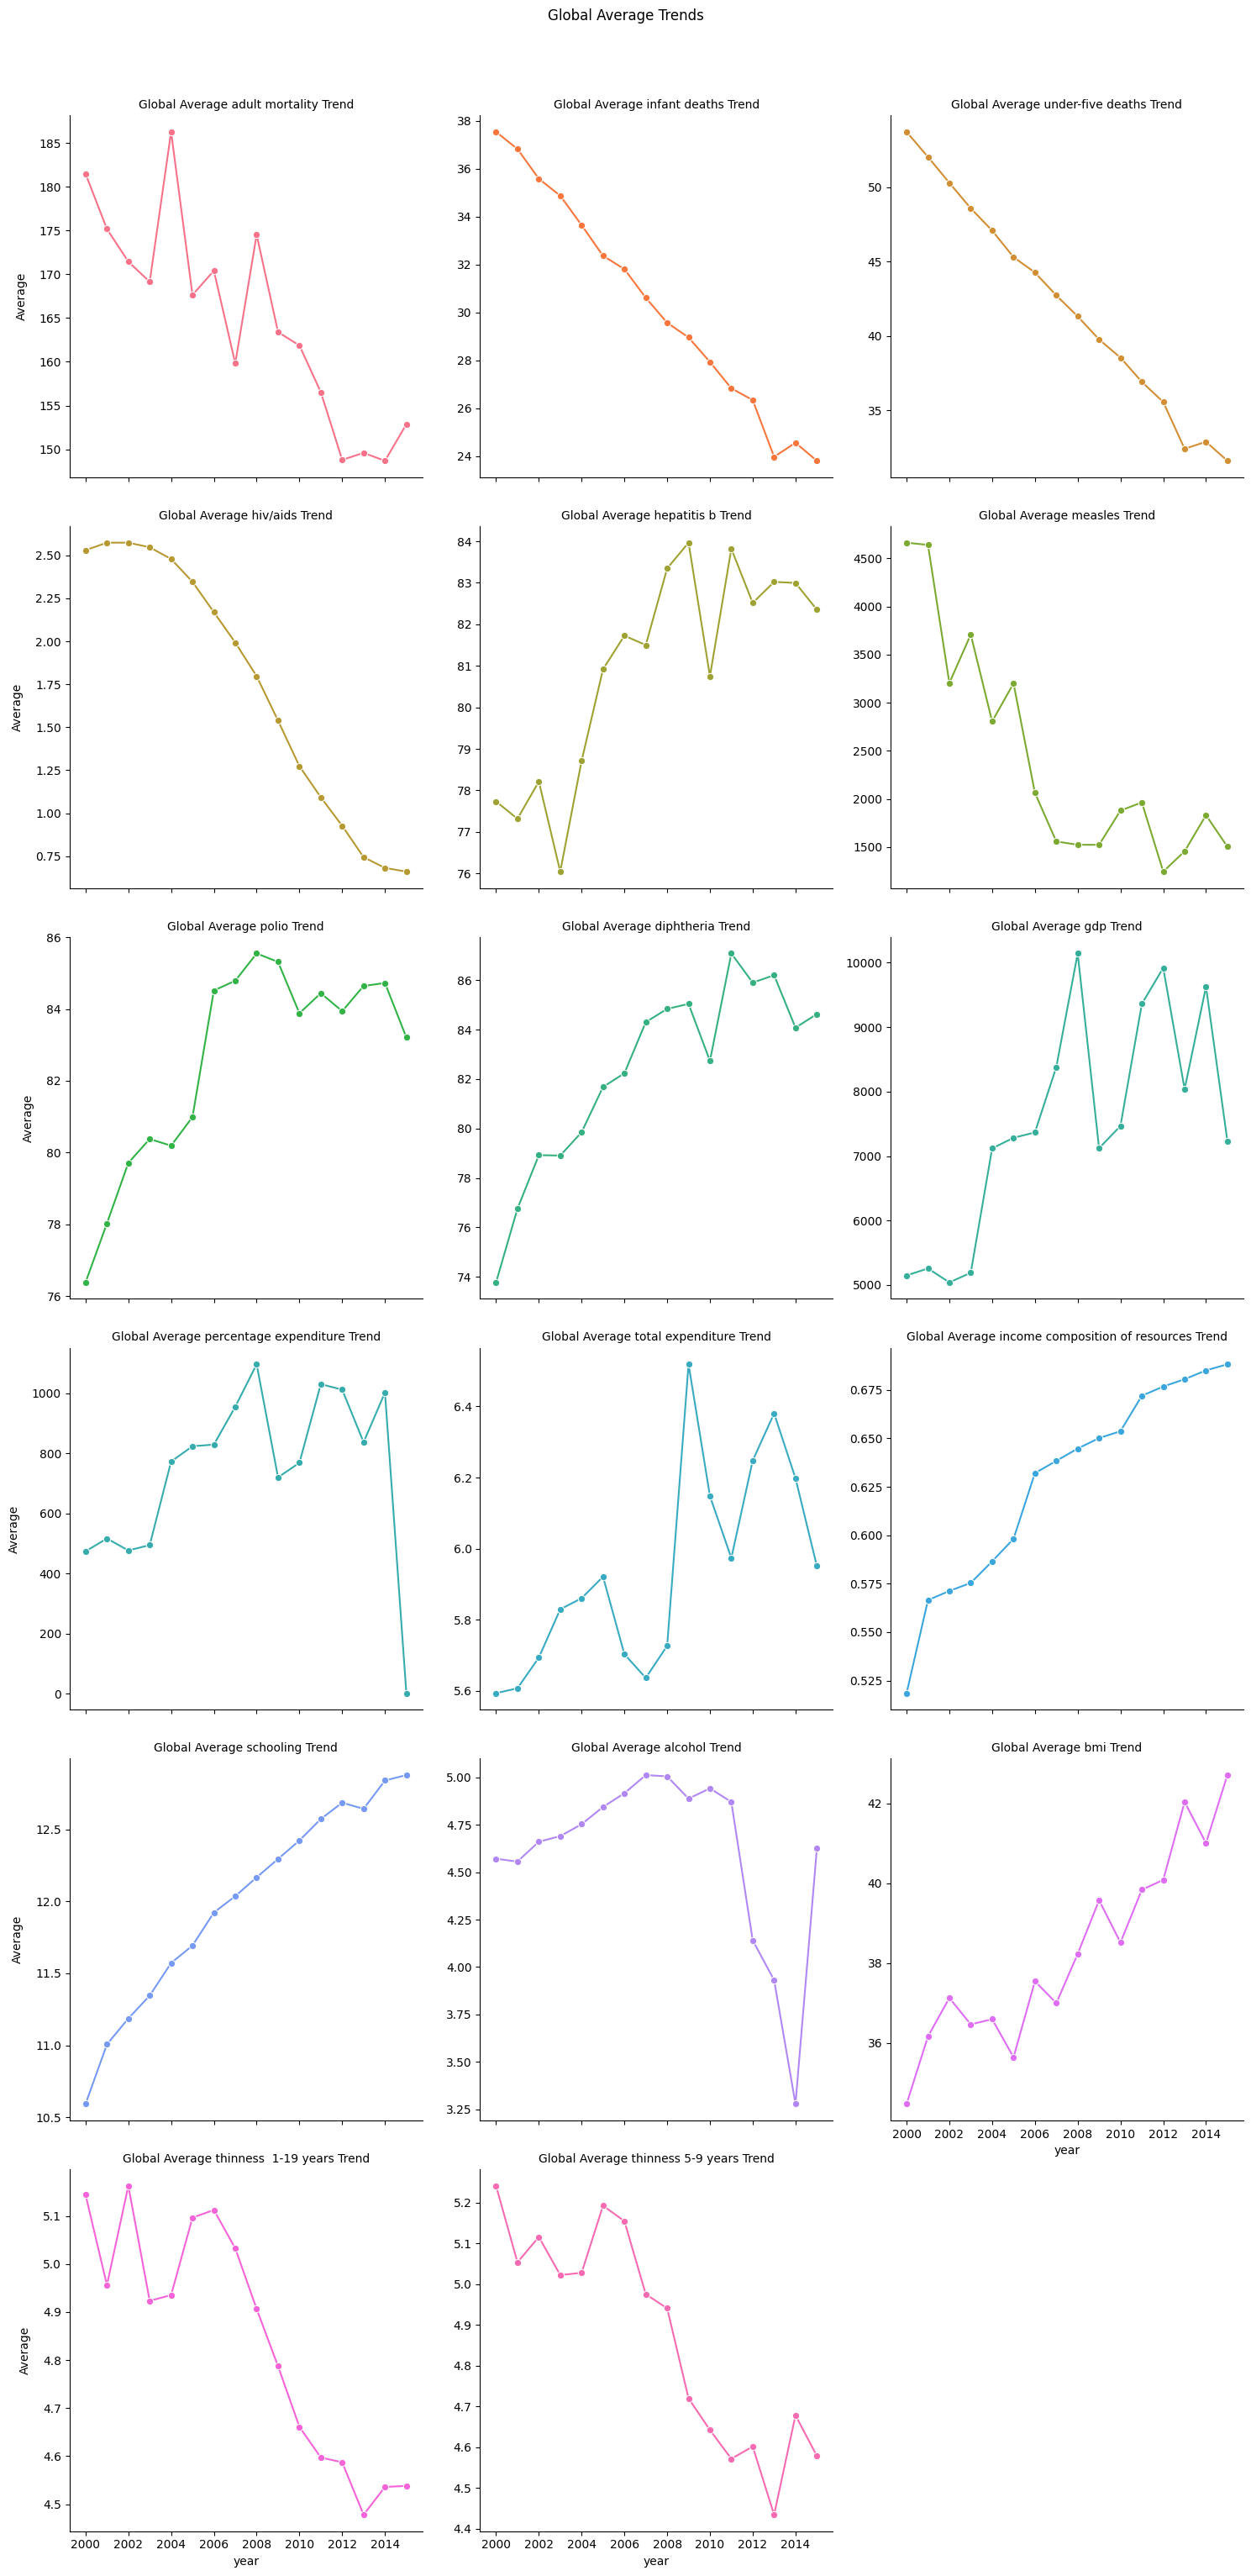

In [16]:
global_trends = df.groupby('year')[[
    'adult mortality',
    'infant deaths',
    'under-five deaths',
    'hiv/aids',
    'hepatitis b',
    'measles',
    'polio',
    'diphtheria',
    'gdp', 
    'percentage expenditure', 
    'total expenditure', 
    'income composition of resources',
    'schooling',
    'alcohol',
    'bmi',
    'thinness  1-19 years',
    'thinness 5-9 years'
]].mean().reset_index()

# Re-arrange dataframe 
global_trends_melted = global_trends.melt(id_vars='year',
                                     var_name='type',
                                     value_name='value')

# Create relplot
ax = sns.relplot(data=global_trends_melted, 
                x="year", 
                y="value",
                hue='type',
                col='type',
                col_wrap=3,
                kind="line",
                legend=None,
                marker='o',
                facet_kws={'sharey': False, 'sharex': True}
)

ax.fig.suptitle("Global Average Trends",y=1.02)
ax.set_titles(col_template="Global Average {col_name} Trend")
ax.set_ylabels("Average",labelpad=10)

plt.tight_layout()
plt.show()

The collection of charts provides a comprehensive visual summary of how different factors have evolved globally between 2000 and 2015. 

- **Mortality Trends:**

    - **Adult Mortality Trend:** Shows a general decreasing trend, though with some fluctuations a notable dip and then rise around 2002-2004, followed by a continued decrease.

    - **Infant Deaths Trend:** Exhibits a consistent and significant decreasing trend over the 15 years.

    - **Under-Five Deaths Trend:** Similar to infant deaths, this also shows a clear and consistent decreasing trend.
 
    - **HIV/AIDS Trend:** This typically shows a decreasing trend from 2000-2015.

- **Immunization & Disease Trends:**

    - **Hepatitis B Trend:** Appears to show a general increasing trend, suggesting improved vaccination coverage.

    - **Measles Trend:** Shows a decreasing trend, though with noticeable fluctuations or spikes in certain years, indicating successful control efforts but also potential outbreaks.

    - **Polio Trend:** Displays an overall increasing trend, reflecting progress in polio eradication efforts.
 
    - **Diphtheria Trend:** This typically shows an increasing trend in immunization coverage, contributing to disease control.

- **Economic & Social Trends:**

    - **GDP Trend:** Shows a general upward trend, indicating global economic growth, though with some dips (e.g., around 2008-2009, likely reflecting the global financial crisis).

    - **Percentage Expenditure Trend:** Appears to fluctuate but generally shows an increasing trend, suggesting more health spending relative to GDP.

    - **Total Expenditure Trend:** Also shows fluctuations, but an overall increasing trend.

    - **Income Composition of Resources Trend:** Displays a consistent and clear increasing trend, indicating improvements in overall human development and income levels.

    - **Schooling Trend:** Shows a steady and consistent increasing trend, reflecting improved access to and duration of education globally.

- **Lifestyle & Health Risk Trends:**

    - **Alcohol Trend:** Appears to show some fluctuations or a slight increase/stabilization.

    - **BMI Trend:** Shows a consistent increasing trend, indicating a rise in average body mass index globally.

    - **Thinness 1-19 years Trend:** Appears to show a decreasing trend, suggesting a reduction in thinness among adolescents.

    - **Thinness 5-9 years Trend:** Also appears to show a decreasing trend, indicating a reduction in thinness among younger children.

This collection of charts provides a powerful visual narrative of global progress in health and development between 2000 and 2015. Key positive trends include:

- Significant reductions in mortality rates (adult, infant, under-five, HIV/AIDS).

- Improvements in immunization coverage.

- Consistent growth in economic indicators and schooling years.

- A concerning increase in average BMI, but a positive decrease in thinness rates.

The charts collectively suggest that global efforts in public health, economic development, and education have had a tangible positive impact on various indicators during this period, contributing to overall improvements in human well-being. The fluctuations in some trends (e.g., GDP, Measles) highlight the dynamic nature of these global factors.


In [17]:
# Get all numaric columns for dataset
numeric_data = df.select_dtypes(include=np.number)

# Get Columns Length
columns_len = len(numeric_data.columns)

# Subplot rows Calculation
rows = int(np.ceil(columns_len / 3))

# Subplot rows Columns
cols = 3

### Identify Outliers

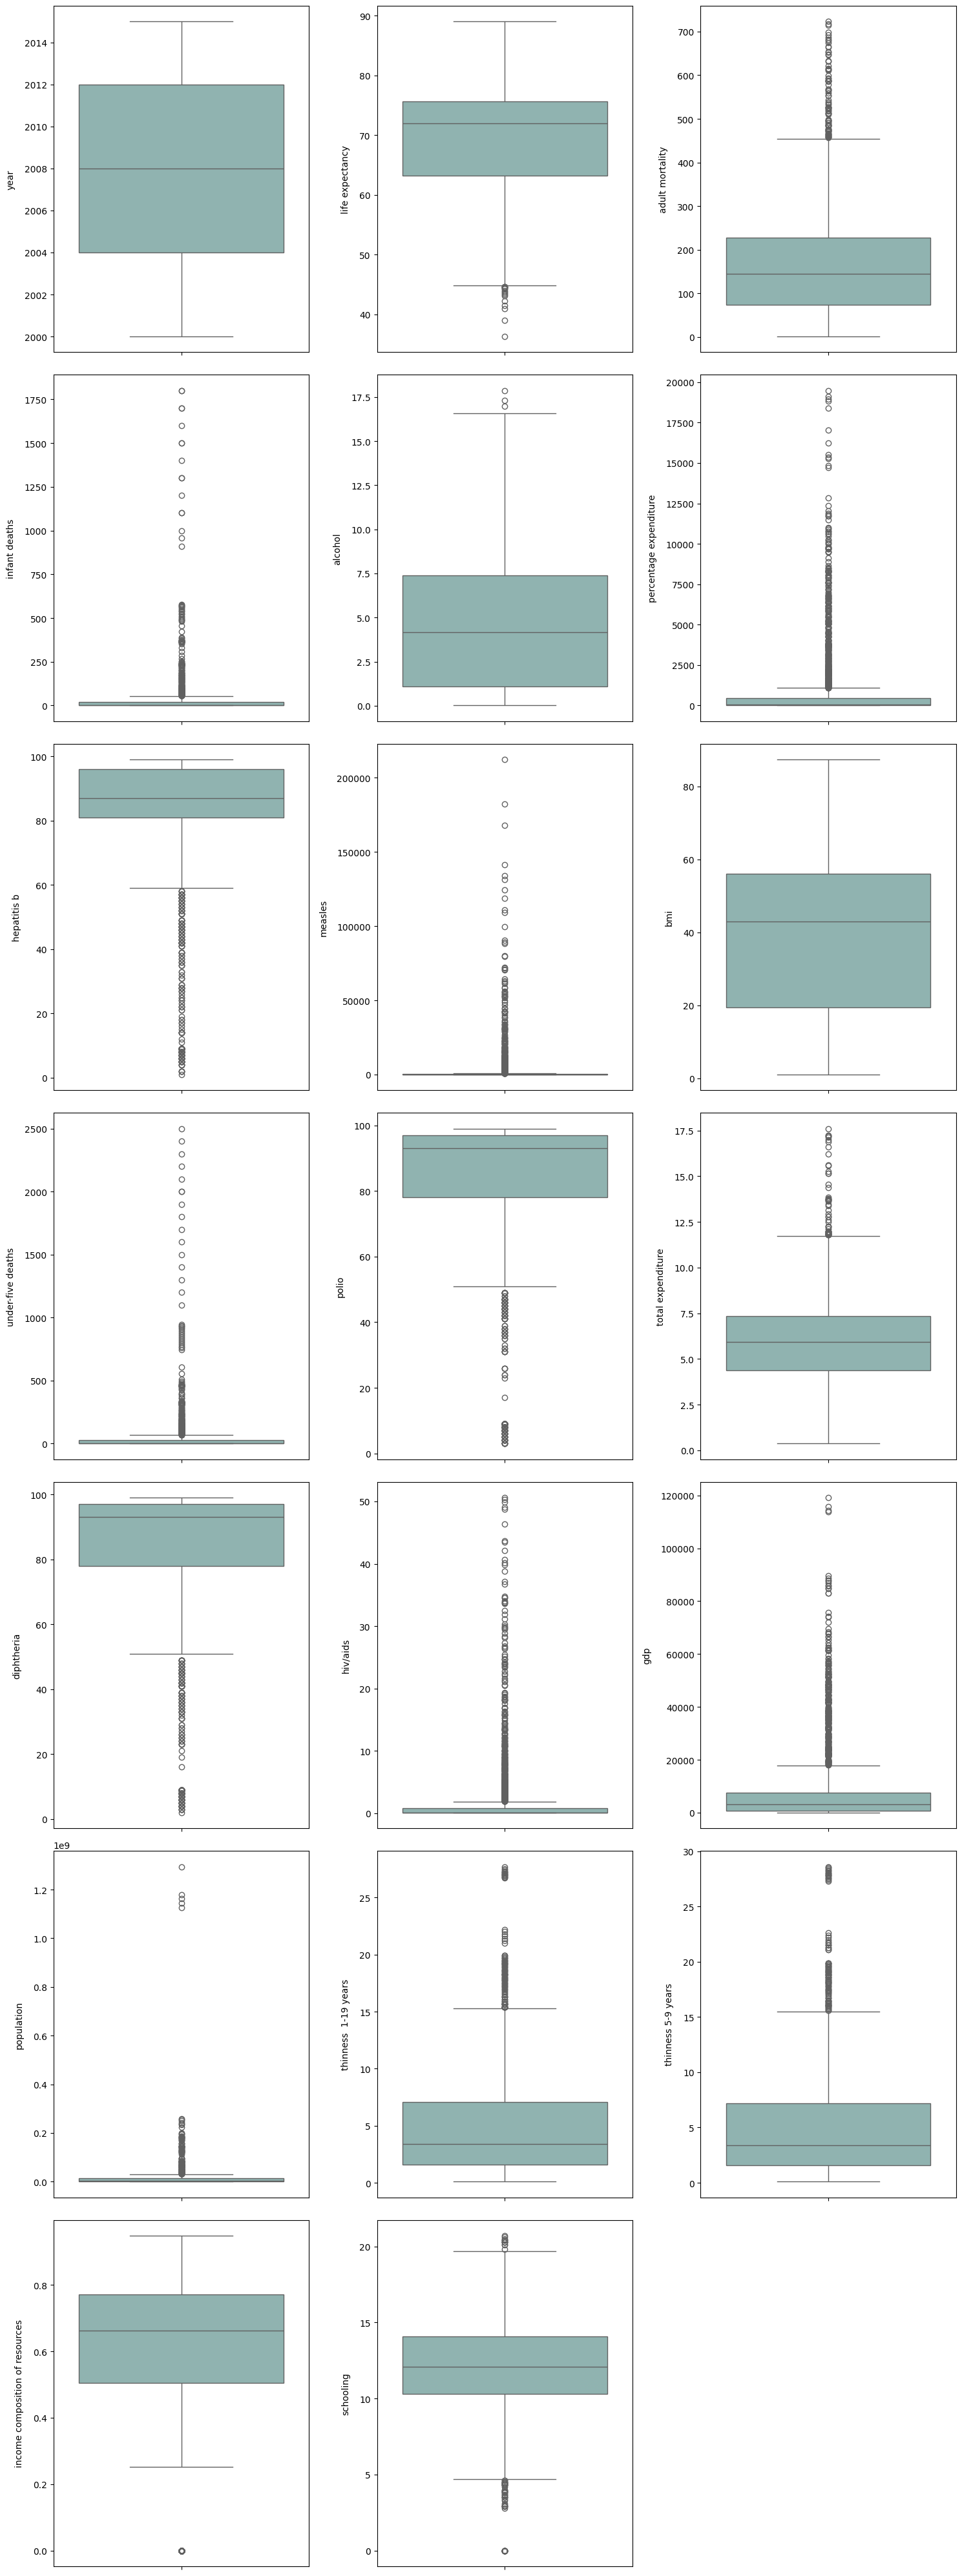

In [18]:
# set chart style properties
plt.figure(figsize=(15, 40))

# Create boxplot for all numeric columns
for i, col in enumerate(numeric_data):
    
    plt.subplot(rows,cols,i+1)
    ax = sns.boxplot(numeric_data[col],color='#8ab9b5')
    ax.set_ylabel(col,labelpad=10)

plt.tight_layout()
plt.show()

These charts are primarily used for outlier detection and to visualize the spread and central tendency of each numerical feature.

- **Year** shows no significant outliers, indicating consistent data collection across all years. The data points are evenly distributed, with no extreme values.

- **Life Expectancy** exhibits a few outliers on both the lower and higher ends. These outliers represent countries with unusually low or high life expectancies compared to the majority.

- **Adult Mortality** shows a significant number of outliers, particularly on the higher end. This indicates that some countries experience exceptionally high adult mortality rates.

- **infant deaths** features a large number of high-value outliers. These outliers highlight countries with extremely elevated rates of infant mortality.

- **Alcohol** consumption shows several outliers, predominantly on the higher side. These points represent countries with exceptionally high per capita alcohol consumption.

- **percentage expenditure** is characterized by numerous extreme outliers towards the higher values. These represent countries with significantly higher health expenditure as a percentage of GDP.

- **Hepatitis B** immunization coverage has some outliers on the lower end. These points denote countries with unusually low vaccination rates for Hepatitis B.

- **Measles** shows a vast number of extreme outliers on the very high end. These represent countries reporting exceptionally large numbers of measles cases, likely due to outbreaks.

- **BMI** contains some outliers on both the lower and higher ends. These suggest countries with unusually low or high average body mass indices.

- **under-five deaths** displays a large number of high-value outliers. These outliers signify countries grappling with extremely high mortality rates for children under five.

- **Polio** immunization coverage exhibits some outliers on the lower end. These points represent countries with unusually low Polio vaccination rates.

- **Total expenditure** shows numerous outliers on the higher side. These points correspond to countries with exceptionally high total health expenditure.

- **Diphtheria** immunization coverage has some outliers towards the lower end. These outliers indicate countries with notably low Diphtheria vaccination rates.

- **HIV/AIDS** mortality features a significant number of outliers, primarily on the higher end. These outliers represent countries with unusually high burdens of HIV/AIDS.

- **GDP** contains a substantial number of extreme outliers on the higher end. These points represent exceptionally wealthy countries with disproportionately high GDPs.

- **Population** shows a massive number of extreme outliers at very high values. These outliers correspond to countries with exceptionally large populations.

- **thinness 1-19 years** displays several outliers, mainly on the higher side. These points indicate countries with unusually high rates of thinness among adolescents.

- **thinness 5-9 years** also shows multiple outliers, predominantly on the higher side. These outliers represent countries with notably high rates of thinness among younger children.

- **Income composition of resources** has some outliers on both ends, though less pronounced than highly skewed variables. These outliers represent countries at the extremes of human development index.

- **Schooling** years exhibits a few outliers on both the lower and higher ends. These outliers indicate countries with unusually low or high average years of schooling.

### Identify Skewness

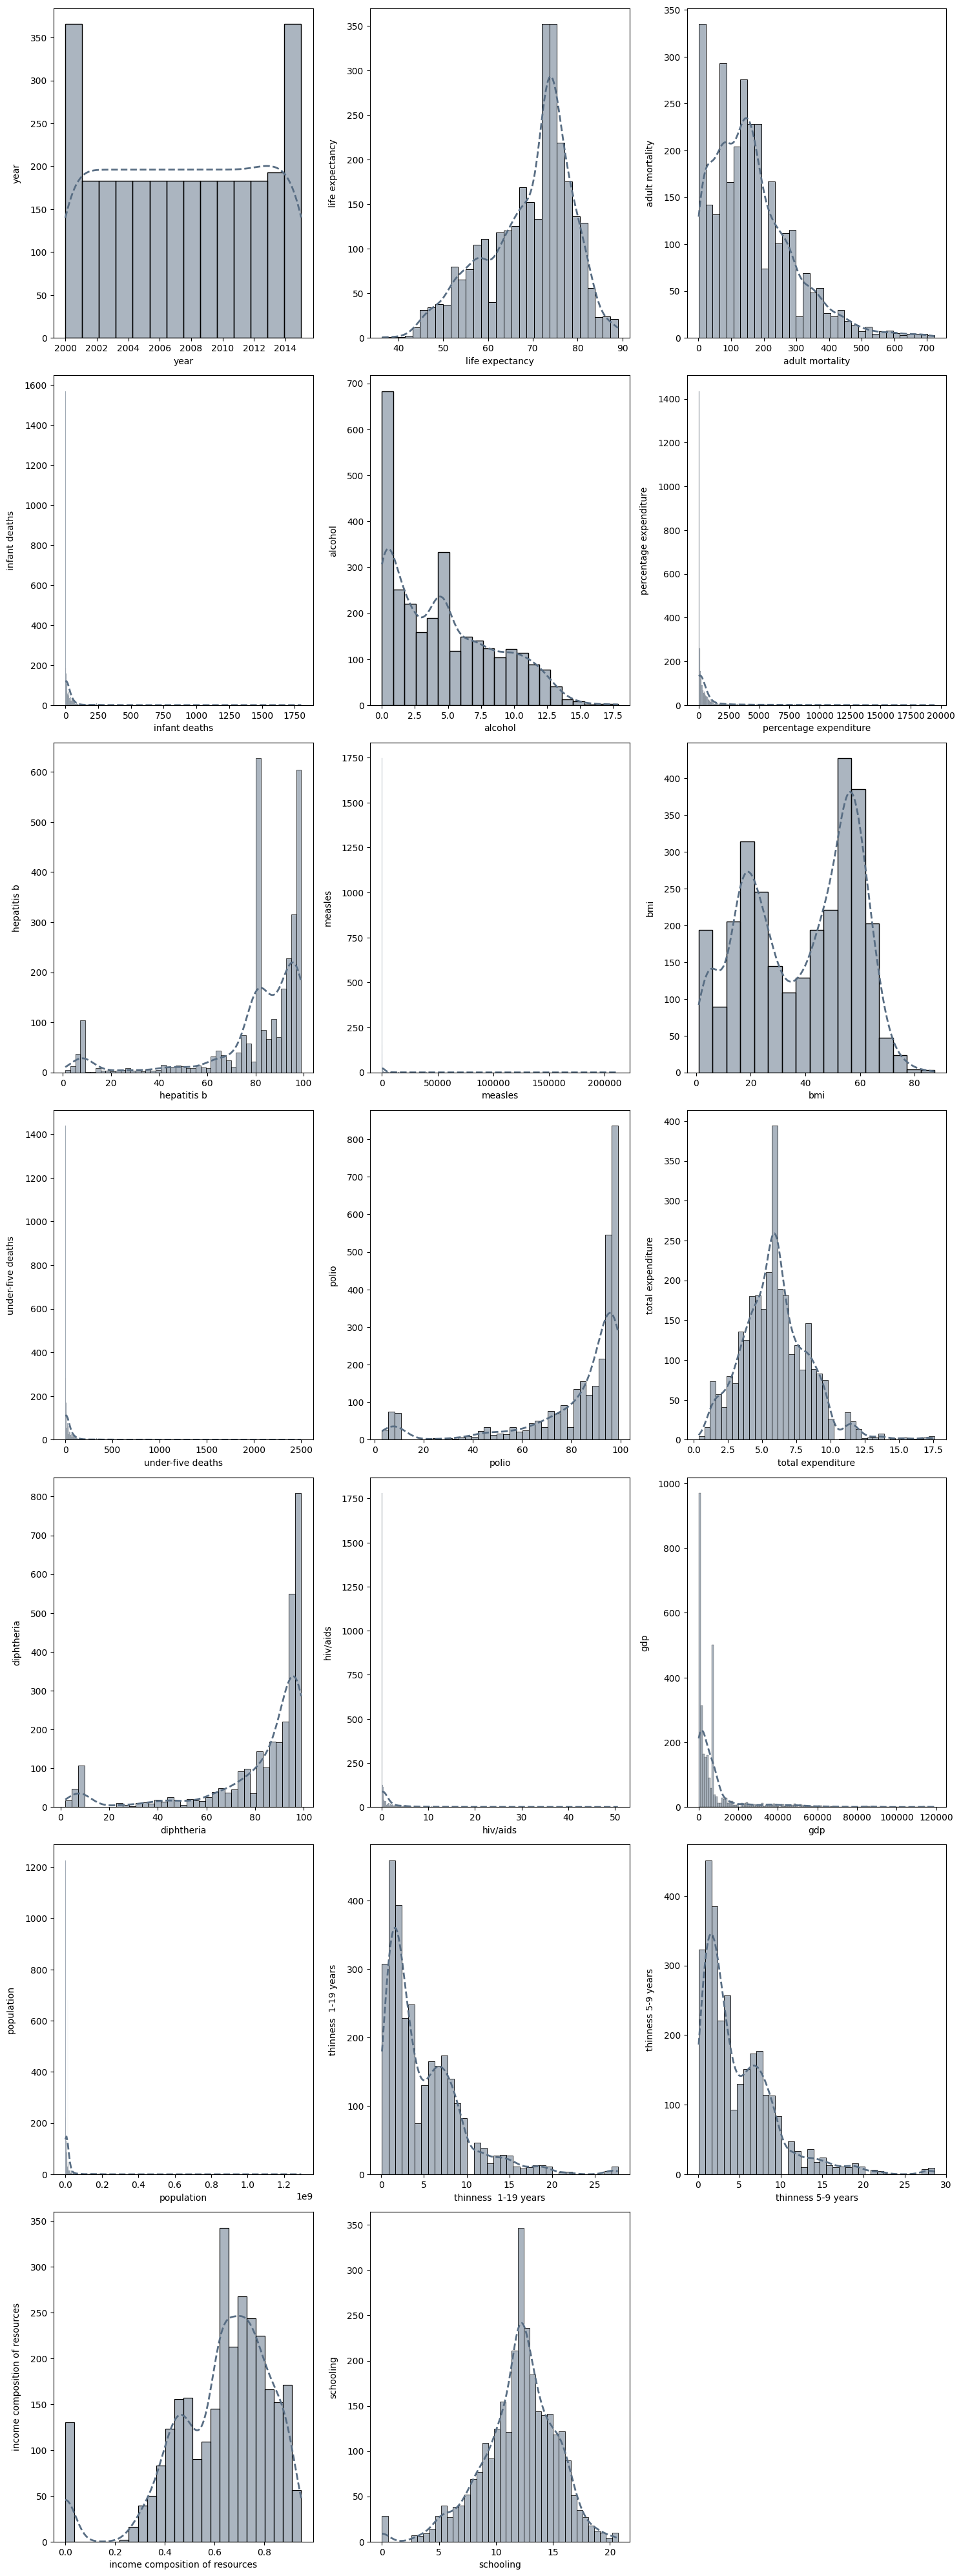

In [19]:
# set chart style properties
plt.figure(figsize=(15, 40))

# Create boxplot for all numeric columns
for i, col in enumerate(numeric_data):
    
    plt.subplot(rows,cols,i+1)
    ax = sns.histplot(numeric_data[col],color='#586d83',kde=True,line_kws={'color': 'darkblue', 'linestyle': '--', 'linewidth': 2})
    ax.set_ylabel(col,labelpad=10)

plt.tight_layout()
plt.show()

These charts are used to visualize the shape of the distribution of each variable, helping to understand skewness, modality, and density.

- **Year** distribution is largely uniform across the observed period (2000-2015). This indicates that data is available consistently for all years within this range.

- **Life Expectancy** distribution is relatively symmetrical, appearing somewhat bell-shaped. Most countries cluster around a central average, with fewer instances at the extreme high or low ends.

- **Adult Mortality** distribution is notably right-skewed, with a large concentration of countries having lower adult mortality rates. The long tail extending to the right confirms the presence of higher mortality burdens in a smaller subset of nations.

- **infant deaths** distribution is highly right-skewed, peaking at very low infant death counts. This indicates that while many countries have relatively few infant deaths, a few face severe challenges.

- **Alcohol** distribution is right-skewed, with most countries having lower consumption levels. A smaller number of countries exhibit much higher average alcohol intake.

- **percentage expenditure** distribution is severely right-skewed, with most countries having relatively low health expenditure percentages. The long tail indicates a vast disparity in health investment across nations.

- **Hepatitis B** distribution tends to be left-skewed, indicating that a majority of countries have high Hepatitis B vaccination coverage. There is a smaller spread of countries with lower coverage.

- **Measles** distribution is extremely right-skewed, with a massive peak at very low reported cases. This highlights that while most countries have few cases, a few experience severe measles burdens.

- **BMI** distribution of 'BMI' appears somewhat centrally concentrated, possibly with a slight skew. This indicates a range of average BMI values across countries.

- **under-five deaths** distribution is heavily right-skewed, with a significant concentration at lower under-five death counts. This reflects that while many countries have low rates, a few face immense challenges.

- **Polio** distribution is generally left-skewed, with most countries achieving high Polio vaccination coverage. Fewer countries have lower average coverage.

- **Total expenditure** distribution is right-skewed, with a majority of countries having lower total health expenditure. A smaller number of nations allocate substantially more.

- **Diphtheria** distribution is typically left-skewed, showing that most countries have high Diphtheria vaccination coverage. There are fewer instances of lower coverage rates.

- **HIV/AIDS** distribution is right-skewed, peaking at lower HIV/AIDS rates. This shows that while many countries have managed to control the disease, some still face severe challenges.

- **GDP** distribution is severely right-skewed, with a vast majority of countries having lower GDPs. This highlights a significant global economic inequality.

- **Population** distribution is extremely right-skewed, with a huge concentration of countries having smaller populations. A tiny fraction of countries possess populations vastly larger than the rest.

- **thinness 1-19 years** distribution is right-skewed, with a peak at lower thinness rates. This indicates that while many countries have managed to control thinness among adolescents, some still face significant challenges.

- **thinness 5-9 years** distribution is right-skewed, similar to 'thinness 1-19 years', with most countries having lower thinness rates for this age group. A smaller number of countries show much higher rates.

- **Income composition of resources** distribution appears relatively spread out, possibly with a slight skew towards higher values. This reflects a range of development levels globally.

- **Schooling** distribution appears fairly well-distributed, possibly with a slight left skew. This suggests that more countries are achieving higher average years of schooling.

### Corelations Map

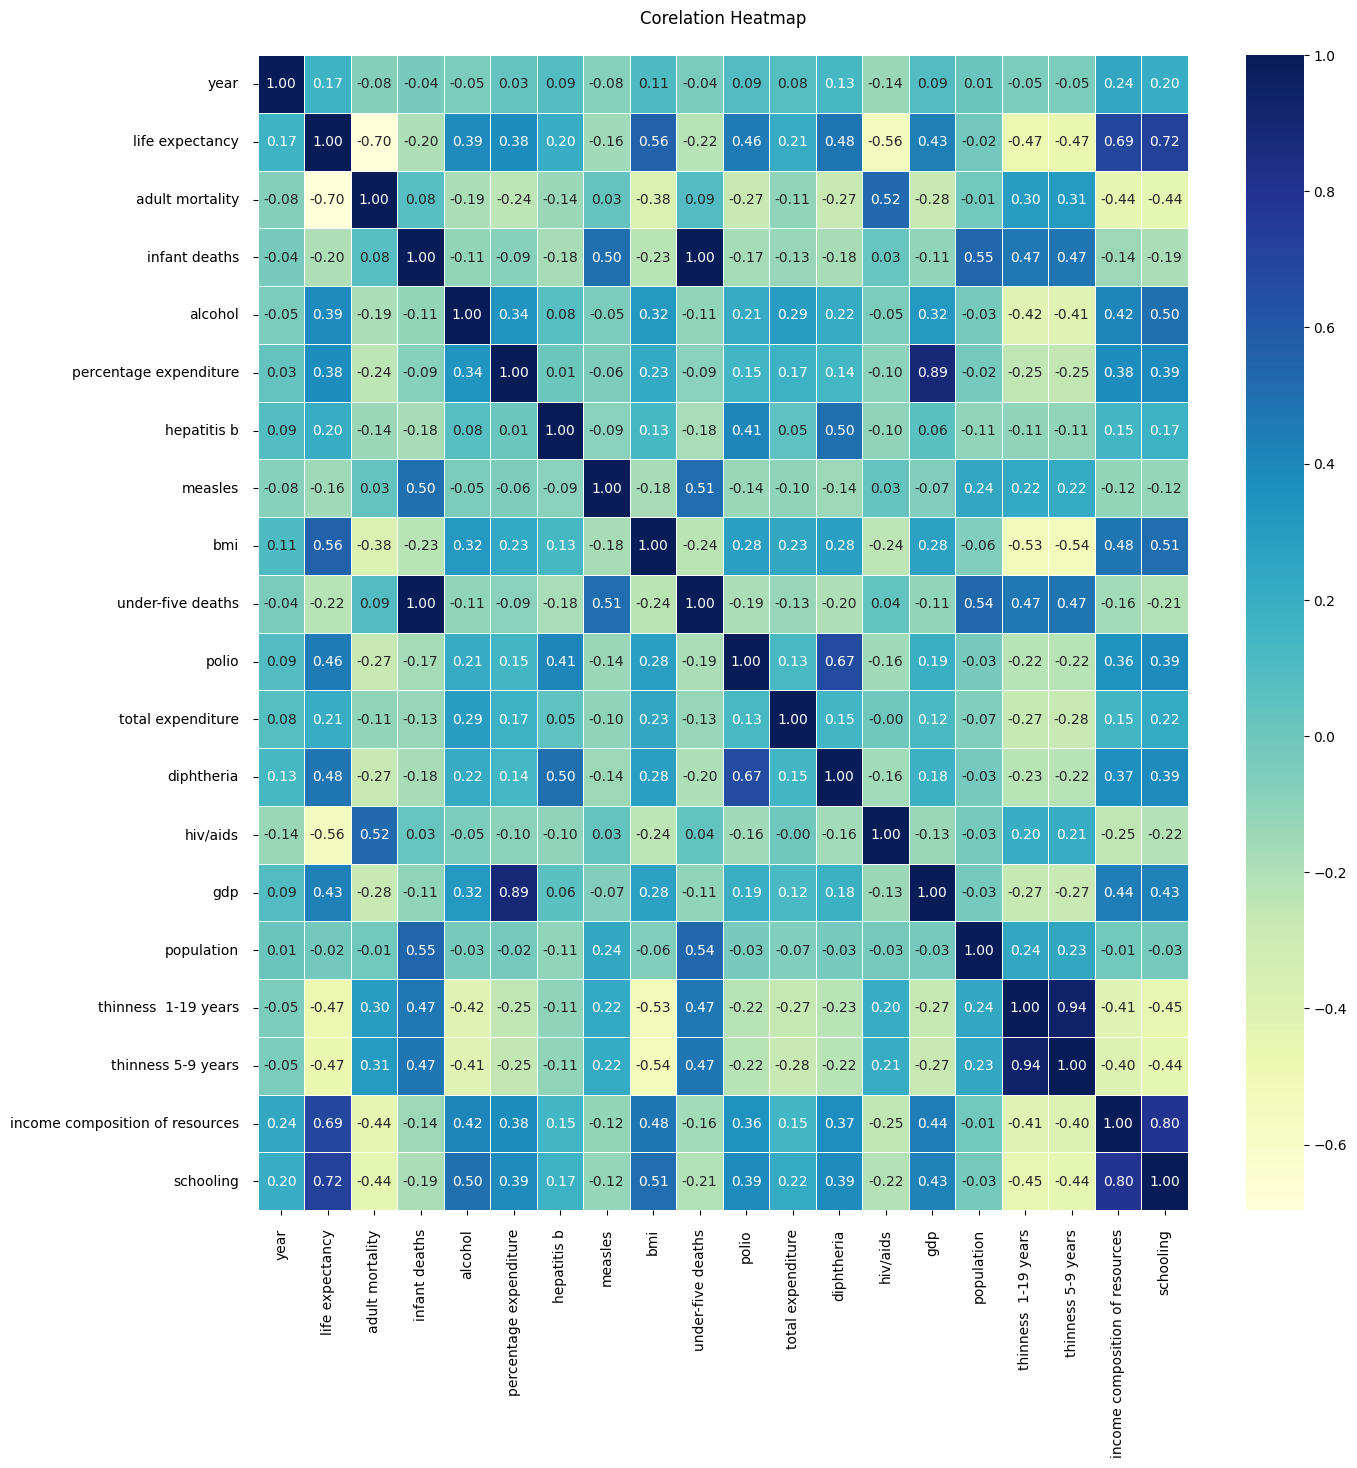

In [20]:
# set chart style properties
plt.figure(figsize=(15,15))

# Create Heatmap
ax = sns.heatmap(df.corr(numeric_only=True),
            annot=True,
            fmt='.2f',
            linewidths=.5,
            cmap="YlGnBu")

# set Heatmap properties
plt.title('Corelation Heatmap', y=1.02)
ax.tick_params(axis='both',pad=10)
plt.show()

This visually represents the correlation coefficients between all pairs of numerical variables in your dataset. This heatmap is useful for feature selection and understanding interdependencies between variables. Colors range from dark blue (strong negative correlation) to yellow (strong positive correlation), with values near zero indicating weak correlation.

In [22]:
# get numaric data correlation
Corr_data = df.corr(numeric_only=True)

# unstack correlation data
unstack_corr_data = Corr_data.unstack()

# remove duplicates_pairs
pairs = unstack_corr_data[unstack_corr_data != 1].drop_duplicates()

# sort pairs in ascending
sorted_pairs = pairs.sort_values(ascending=False)

## Top Six Positive Correlation

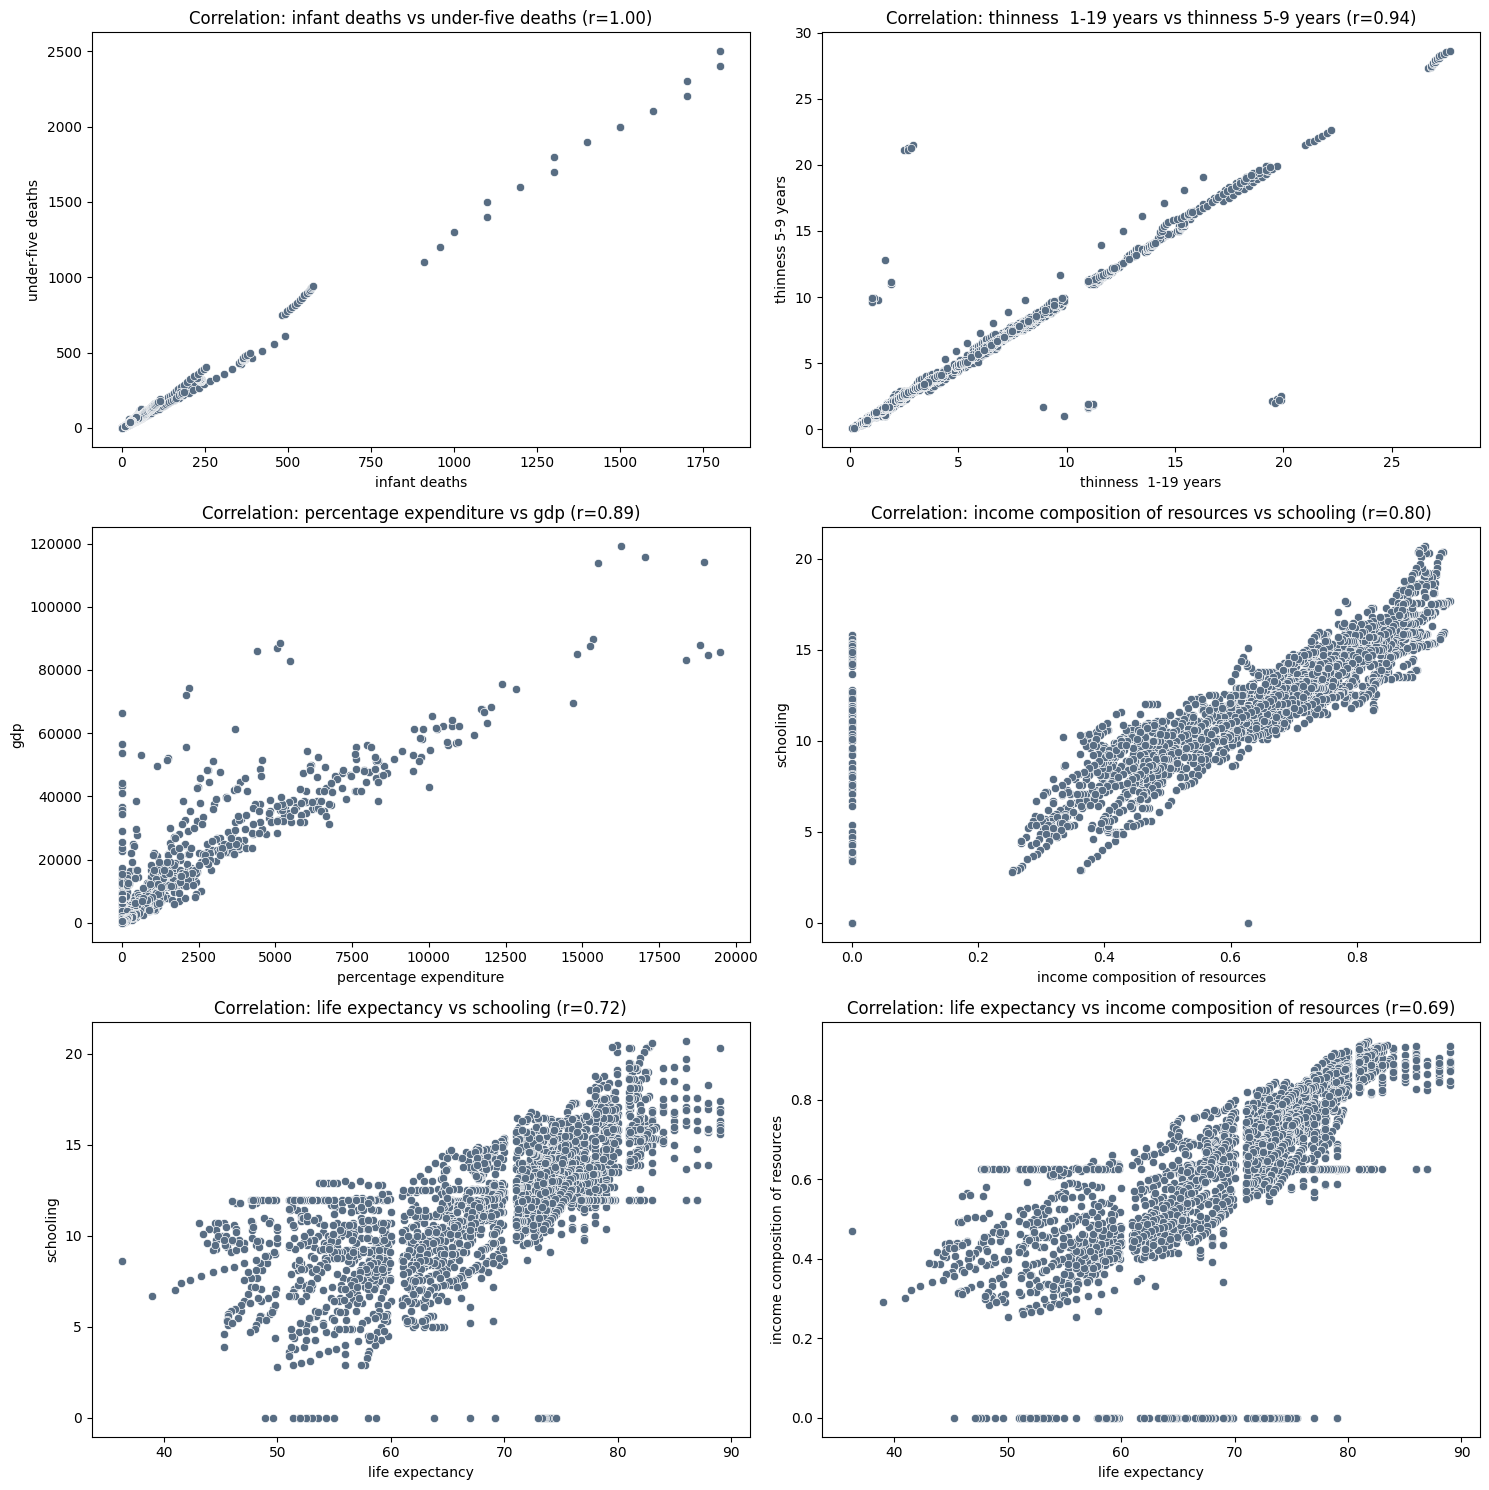

In [23]:
# set chart style properties
plt.figure(figsize=(15, 15))

for i, ((x_val, y_val), corr_val) in enumerate(sorted_pairs.head(6).items()):
    
    plt.subplot(3,2,i+1)

    # Create scatterplot
    sns.scatterplot(data=df, x=x_val, y=y_val,color='#586d83')
    
    # set scatterplot properties
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.title(f'Correlation: {x_val} vs {y_val} (r={corr_val:.2f})')
    plt.xlabel(x_val)
    plt.ylabel(y_val)

plt.tight_layout()
plt.show()


**Correlation: infant deaths vs under-five deaths (r=1.00)**

This plot shows an almost perfect positive linear relationship between infant deaths and under-five deaths. The points form a very tight line, indicating that as infant deaths increase, under-five deaths increase proportionally. This is expected, as infant deaths are a component of under-five deaths.

**Correlation: thinness 1-19 years vs thinness 5-9 years (r=0.94)**

There is a very strong positive linear relationship between thinness in the 1-19 years age group and thinness in the 5-9 years age group. This indicates that countries with higher rates of thinness in younger children also tend to have higher rates in adolescents, suggesting common underlying factors like malnutrition or poverty. 

**Correlation: percentage expenditure vs gdp (r=0.89)**

This plot shows a strong positive correlation between percentage expenditure on health and GDP. As GDP increases, the percentage expenditure on health also tends to increase. The scatter is somewhat dispersed at higher GDP values, but the general trend is clear.

**Correlation: income composition of resources vs schooling (r=0.80)**

 There is a strong positive linear relationship between the income composition of resources and schooling. Countries with a higher income composition also tend to have more years of schooling. This aligns with expectations, as education is a key component of human development.
 
**Correlation: life expectancy vs schooling (r=0.72)**

This plot demonstrates a strong positive relationship between life expectancy and schooling. As the average years of schooling in a country increase, so does its life expectancy. The points show a clear upward trend, indicating that education is a significant factor influencing longevity. 

**Correlation: life expectancy vs income composition of resources (r=0.69)**

This plot also shows a strong positive relationship between life expectancy and income composition of resources. Countries with a higher income composition tend to have longer life expectancies. 

## Top Six Negative Correlation

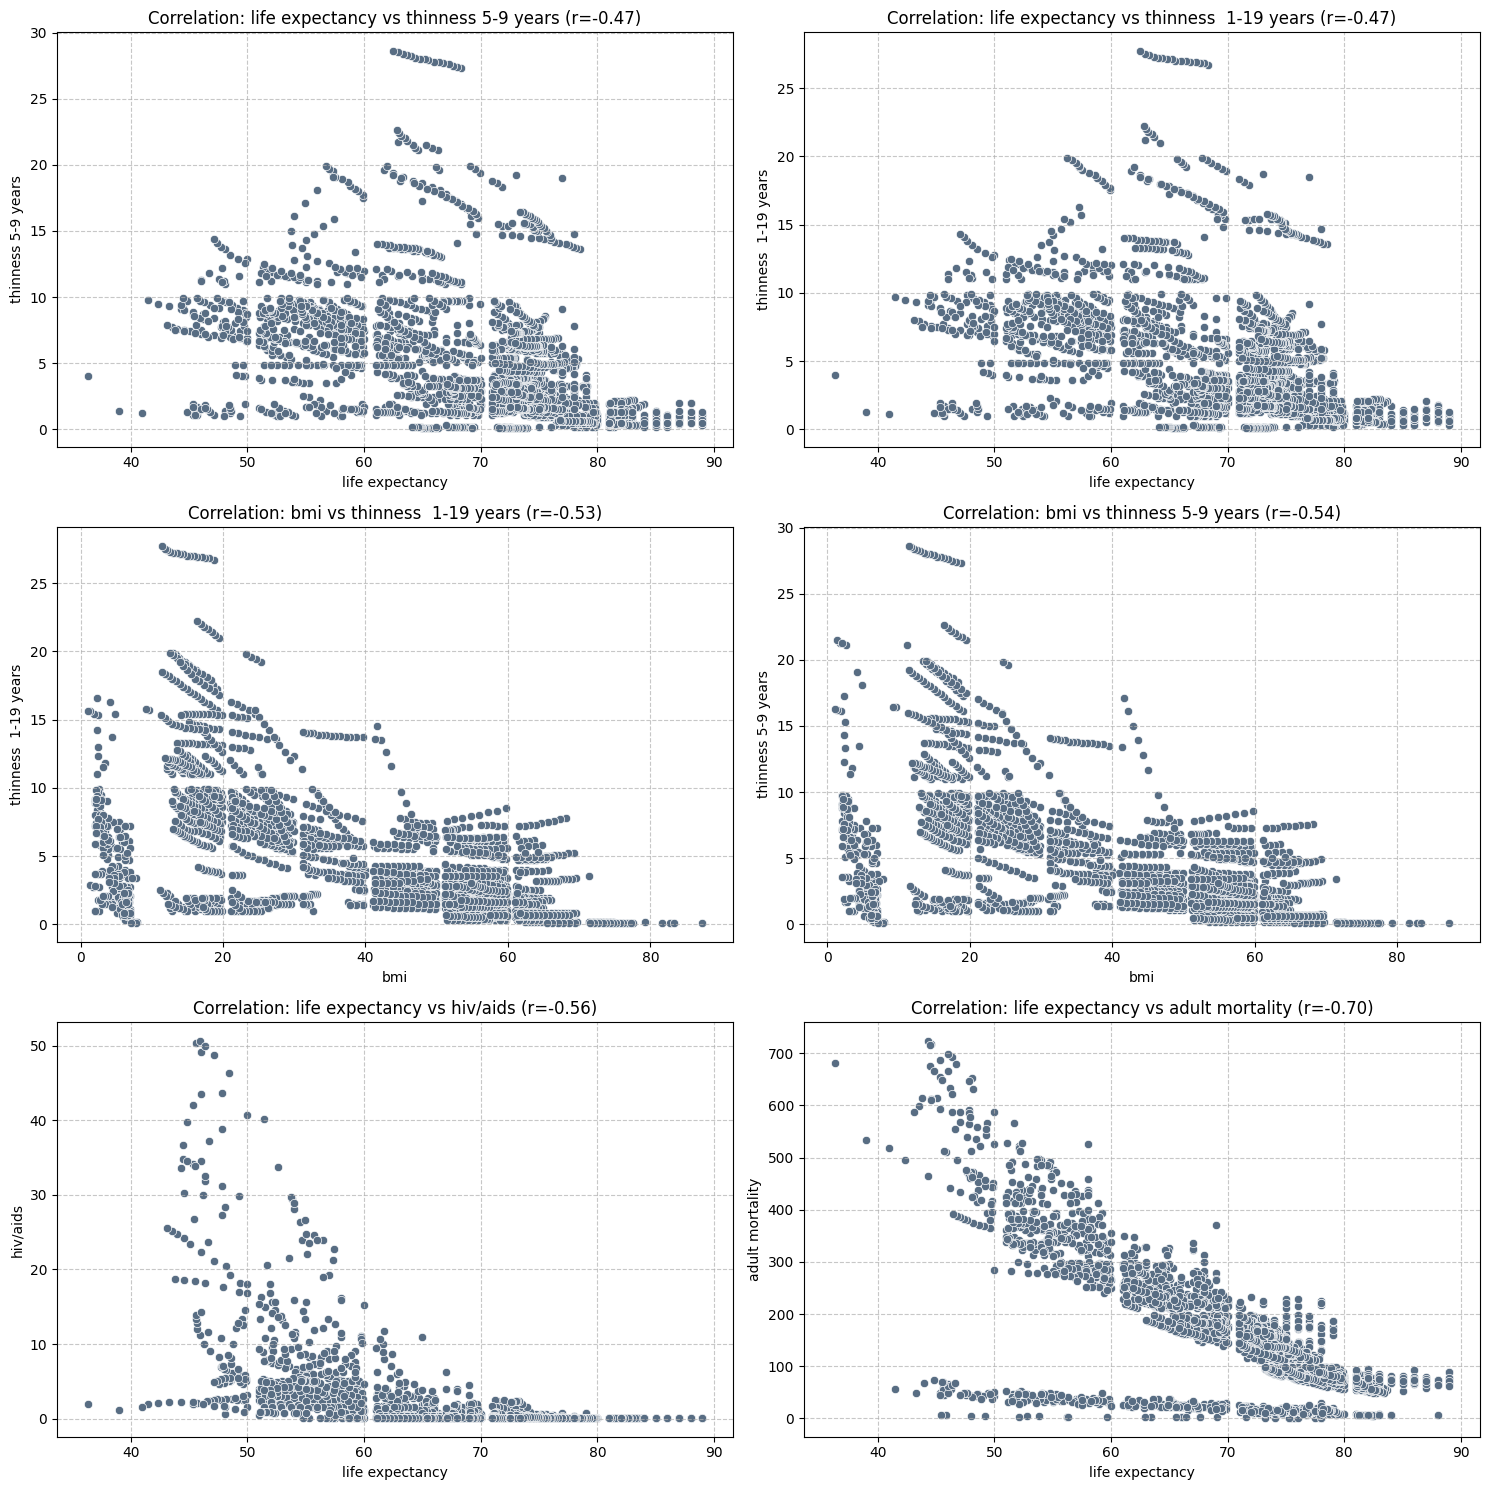

In [24]:
# set chart style properties
plt.figure(figsize=(15, 15))

for i, ((x_val, y_val), corr_val) in enumerate(sorted_pairs.tail(6).items()):
    
    plt.subplot(3,2,i+1)
    
    # Create scatterplot
    ax = sns.scatterplot(data=df, x=x_val, y=y_val,color='#586d83')
    
    # set scatterplot properties
    ax.grid(True, linestyle='--', alpha=0.7)
    plt.title(f'Correlation: {x_val} vs {y_val} (r={corr_val:.2f})')
    plt.xlabel(x_val)
    plt.ylabel(y_val)

plt.tight_layout()
plt.show()


**Correlation: life expectancy vs thinness 5-9 years (r=-0.47)**

This plot shows a moderate negative correlation. As 'Life expectancy' increases, the 'thinness 5-9 years' rate tends to decrease. This suggests that countries with higher life expectancies generally have lower rates of thinness among younger children.

**Correlation: life expectancy vs thinness 1-19 years (r=-0.47)**

Similar to the previous plot, this also shows a moderate negative correlation. As 'Life expectancy' increases, the 'thinness 1-19 years' rate tends to decrease. This indicates that better overall health (reflected in higher life expectancy) is associated with lower rates of thinness in adolescents. 

**Correlation: bmi vs thinness 1-19 years (r=-0.53)**

This plot shows a moderate negative correlation. As 'BMI' (Body Mass Index) increases, the 'thinness 1-19 years' rate tends to decrease. This is an expected relationship, as higher BMI generally indicates less thinness and potentially better nutritional status, while thinness indicates lower BMI.

**Correlation: bmi vs thinness 5-9 years (r=-0.54)**

Similar to the previous plot, this also shows a moderate negative correlation. As 'BMI' increases, the 'thinness 5-9 years' rate tends to decrease. This reinforces the inverse relationship between average BMI and the prevalence of thinness in younger age groups.
 
**Correlation: life expectancy vs hiv/aids (r=-0.56)**

This plot demonstrates a strong negative correlation. As 'Life expectancy' increases, the 'HIV/AIDS' rate tends to decrease. This is a critical public health insight, showing that lower HIV/AIDS prevalence or impact is strongly associated with longer life spans. The scatter is quite wide, especially at lower life expectancies, indicating variability. 

**Correlation: life expectancy vs adult mortality (r=-0.70)**

This plot shows a very strong negative correlation. As 'Life expectancy' increases, 'Adult Mortality' rates significantly decrease. This is a fundamental and expected relationship: lower adult mortality directly contributes to higher life expectancy. The points show a clear downward trend.

### Average Life Expectancy, GDP, And Population Across Countries From 2000 to 2015

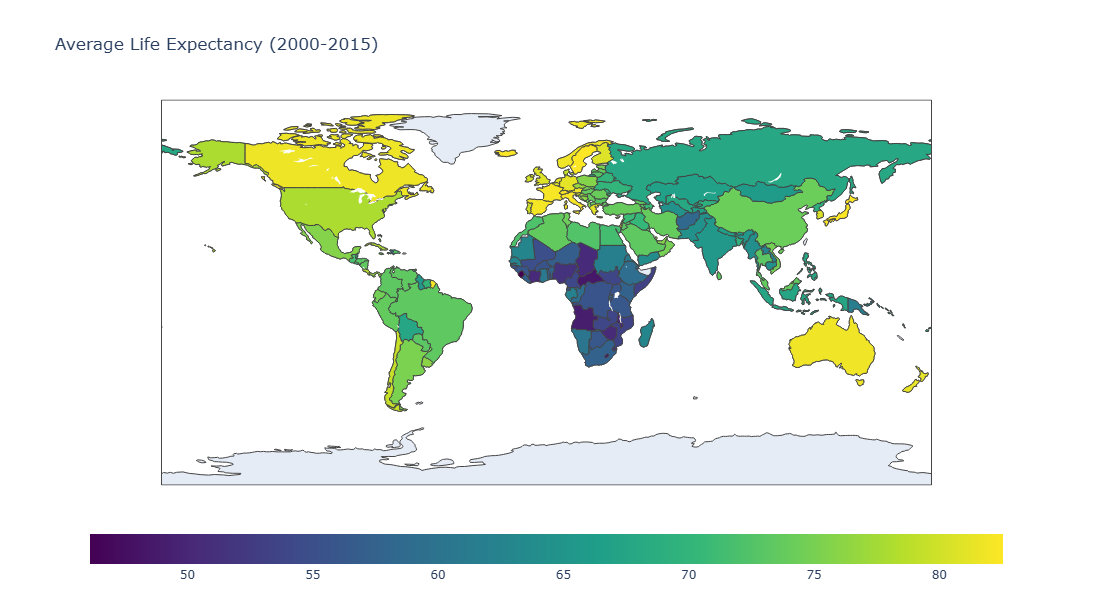

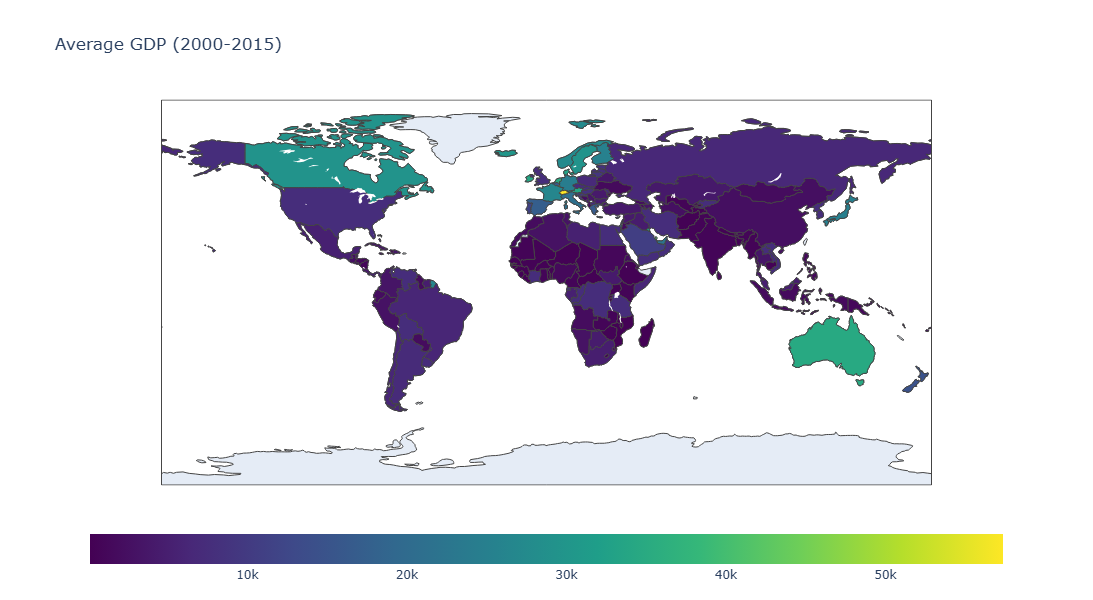

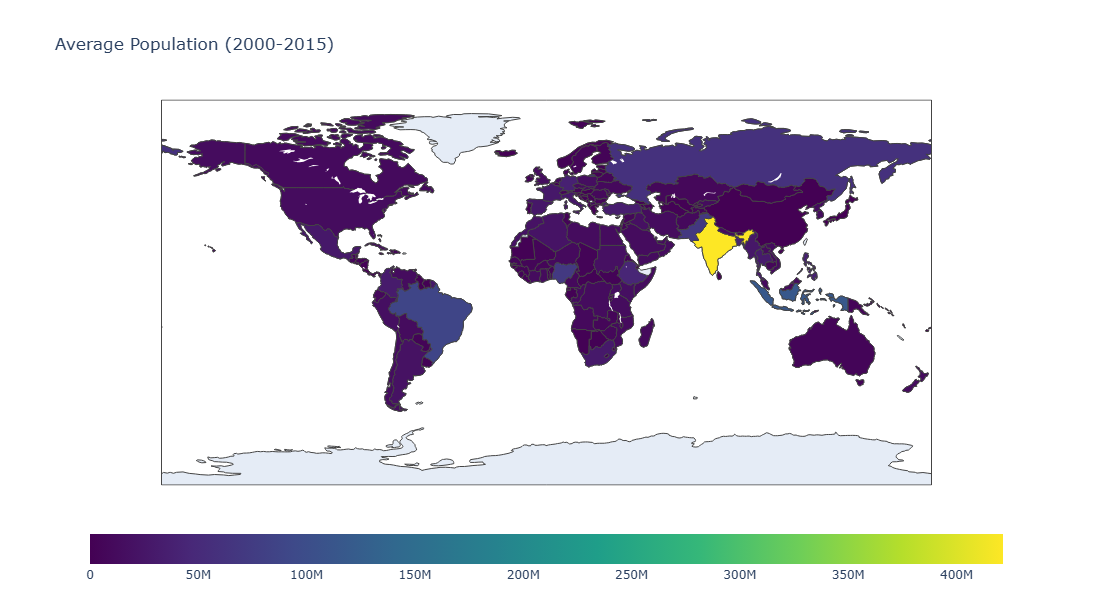

In [25]:
# Average Lifestyle, GDP, Population by Country.
map_data = df.groupby('country')[['life expectancy','gdp','population']].mean().round(2).reset_index()

# Create Map For Country
map = px.choropleth(map_data,
                    locations="country",       
                    locationmode="country names", 
                    color="life expectancy",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Average Life Expectancy (2000-2015)",
                    projection="equirectangular",
                    width=950,
                    height=600 
                   )

# Set Map Properties
map.update_layout(
    coloraxis_colorbar=dict(
        title=None,
        x=0.5,
        y=-0.1,
        xanchor="center",
        yanchor="top",
        orientation="h"
    )
)
map.show()

# Create Map For GDP
map2 = px.choropleth(map_data,
                    locations="country",       
                    locationmode="country names", 
                    color="gdp",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Average GDP (2000-2015)",
                    projection="equirectangular",
                    width=950,
                    height=600 
                   )

# Set Map Properties
map2.update_layout(
    coloraxis_colorbar=dict(
        title=None,
        x=0.5,
        y=-0.1,
        xanchor="center",
        yanchor="top",
        orientation="h"
    )
)
map2.show()

# Create Map For Population
map3 = px.choropleth(map_data,
                    locations="country",       
                    locationmode="country names", 
                    color="population",
                    color_continuous_scale=px.colors.sequential.Viridis,
                    title="Average Population (2000-2015)",
                    projection="equirectangular",
                    width=950,
                    height=600 
                   )

# Set Map Properties
map3.update_layout(
    coloraxis_colorbar=dict(
        title=None,
        x=0.5,
        y=-0.1,
        xanchor="center",
        yanchor="top",
        orientation="h"
    )
)
map3.show()

This charts visualizing the average values of 'Life Expectancy', 'GDP', and 'Population' across countries from 2000 to 2015.

**Average Life Expectancy (2000-2015):** This map visually represents the global distribution of average life expectancy.

- Countries in **North America, Western Europe, Australia, and parts of East Asia** tend to have **higher average life expectancies.**

- Many countries in **Sub-Saharan Africa** exhibit **lower average life expectancies.**

- South America, parts of Eastern Europe, and South-East Asia show intermediate life expectancy values.

**Average GDP (2000-2015):** This map visually represents the global distribution of average GDP.

- **North America, Western Europe, Australia, and parts of East Asia** are indicating **very high average GDPs.**

- Most countries in **Africa, South America, and parts of Asia** are signifying **lower average GDPs.**

- The map visually reinforces the significant economic disparities across the globe, with wealth concentrated in certain regions.

**Average Population (2000-2015):** This map visually represents the global distribution of average Population.

- **India** are highlighted in bright yellow, indicating their **exceptionally large average populations** during the period.

- Other populous countries like the **United States, Indonesia, Brazil, and Nigeria** showing their significant populations.

- Most other countries are representing smaller populations.

- This map visually confirms the concentration of a large portion of the world's population in a few key countries.

## Recommendations

- **Focus on Developing Nations:** Direct health and development resources towards developing countries, especially in Africa, to further reduce mortality and increase life expectancy.

- **Invest in Education and Economy:** Promote schooling and economic growth, as these are fundamental drivers for better health outcomes and longer lifespans.

- **Address Specific Disease Burdens:** Investigate and control high measles case numbers in developing countries to protect vulnerable populations.

- **Strengthen Immunization Programs:** Expand and sustain vaccination efforts for diseases like Hepatitis B, Polio, and Diphtheria, especially in regions with lower coverage.

- **Manage Lifestyle Health Risks:** Develop strategies to address rising BMI trends globally and monitor alcohol consumption patterns.

- **Reduce Thinness:** Implement programs to reduce thinness rates, particularly among children and adolescents in developing countries.